/c/Users/junec/AppData/Local/Programs/Python/Python38/python
load & denoise real field data===========================
---load data from 'txt' or 'xlsx' files...
check the time type
---denoising data using S-G smoothing...
---The first & second order derivative has been calculated and appended to pressure dataframe
len(ground_truth_denoised) 60
after remove uncorrect ground truth
len(ground_truth_denoised) 54


Elapsed time(hr)  Pressure(psia)  first_order_derivative  \
count      29813.000000    29813.000000            29813.000000   
mean        1949.504754     5858.252763               30.980488   
std         1071.285888     1201.608375              217.076860   
min            0.000000     2989.186167            -1177.363679   
25%         1223.614626     4920.227064              -26.315082   
50%         2055.749995     5958.685278                6.577672   
75%         2691.845828     6884.300893               50.575874   
max         4070.949737     7942.372157             1442.449150   

       second_order_derivative  
count             29813.000000  
mean              -3316.399705  
std               26067.263416  
min             -267661.267543  
25%                -150.940811  
50%                   0.048895  
75%                 129.782625  
max              199644.890976

Elapsed time(hr)  Liquid rate(STB/D)
count      10191.000000        10191.000000
mean        2210.383315       -16880.702745
std         1121.860526         4591.205914
min            0.433384       -22568.277381
25%         1345.039547       -19746.868884
50%         2248.487512       -18758.998204
75%         3074.228818       -15911.221687
max         4075.570423            1.166046

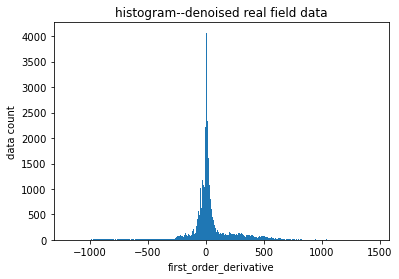

In [1]:
%run imports_N_loadDenoised.ipynb

In [2]:
end_time=list(rate_df["Elapsed time(hr)"])[-1]
end_time

4075.570422500168

In [3]:
rate_file="../data_input/Processed_Rate.txt"
rate_df_processed = pd.read_csv(rate_file, delimiter="\t",skiprows=2, names=["Elapsed time(hr)", "Liquid rate(STB/D)"],skipinitialspace = True)
rate_df_processed

Elapsed time(hr)  Liquid rate(STB/D)
0            0.429719             -3916.6
1           11.763000             -4496.1
2           14.179700             -8631.8
3           21.846400             -9375.3
4           26.013100            -11757.6
..                ...                 ...
245      10716.200000             -5785.3
246      10740.500000             -8866.1
247      10763.700000            -10355.7
248      10767.200000            -12500.2
249      10799.000000            -15584.7

[250 rows x 2 columns]

In [4]:
sub_rate_df_processed=rate_df_processed.loc[rate_df_processed["Elapsed time(hr)"]  <= end_time]
sub_rate_df_processed


Elapsed time(hr)  Liquid rate(STB/D)
0            0.429719            -3916.60
1           11.763000            -4496.10
2           14.179700            -8631.80
3           21.846400            -9375.30
4           26.013100           -11757.60
..                ...                 ...
164       3882.640000                0.00
165       3883.190000            -6906.53
166       3890.020000           -12695.00
167       3894.860000           -14218.30
168       3904.940000           -16287.50

[169 rows x 2 columns]

In [5]:
sub_rate_df_zero=rate_df_processed.loc[rate_df_processed["Liquid rate(STB/D)"]  ==0]
len(sub_rate_df_zero)
# sub_rate_df_zero

37

In [6]:
breakPoints_grountTruth=[]
for i in range(len(sub_rate_df_processed)):
    time_breakpoint=sub_rate_df_processed.iloc[i]["Elapsed time(hr)"]
    timeinterval=list(abs(pressure_df["Elapsed time(hr)"]-time_breakpoint))
    point_index=timeinterval.index(min(timeinterval))
    breakPoints_grountTruth.append(point_index)
breakPoints_grountTruth
len(breakPoints_grountTruth)
%store breakPoints_grountTruth

Stored 'breakPoints_grountTruth' (list)


In [7]:
breakPoints_zeroRate=[]
for i in range(len(sub_rate_df_zero)):
    time_breakpoint=sub_rate_df_zero.iloc[i]["Elapsed time(hr)"]
    timeinterval=list(abs(pressure_df["Elapsed time(hr)"]-time_breakpoint))
    point_index=timeinterval.index(min(timeinterval))
    breakPoints_zeroRate.append(point_index)
breakPoints_zeroRate
len(breakPoints_zeroRate)

37

In [8]:
# toDetect=CurveParametersCalc()
# points=breakPoints_grountTruth
# buildUp_groundTruth,drawDown_groundTruth=toDetect.detect_breakpoint_type(pressure_measure,
#                                pressure_time,
#                                points,
#                                 time_halfWindow=10,
#                                 min_pointsNumber=10
#                               )
# print(len(buildUp_groundTruth),len(drawDown_groundTruth))
# buildUp_groundTruth=[point for point in breakPoints_grountTruth if point not in drawDown_groundTruth]
# len(buildUp_groundTruth),len(drawDown_groundTruth)

'buildup:37, drawdown:144'
---initializing...
---plotting...


findfont: Font family ['Arial Black'] not found. Falling back to DejaVu Sans.


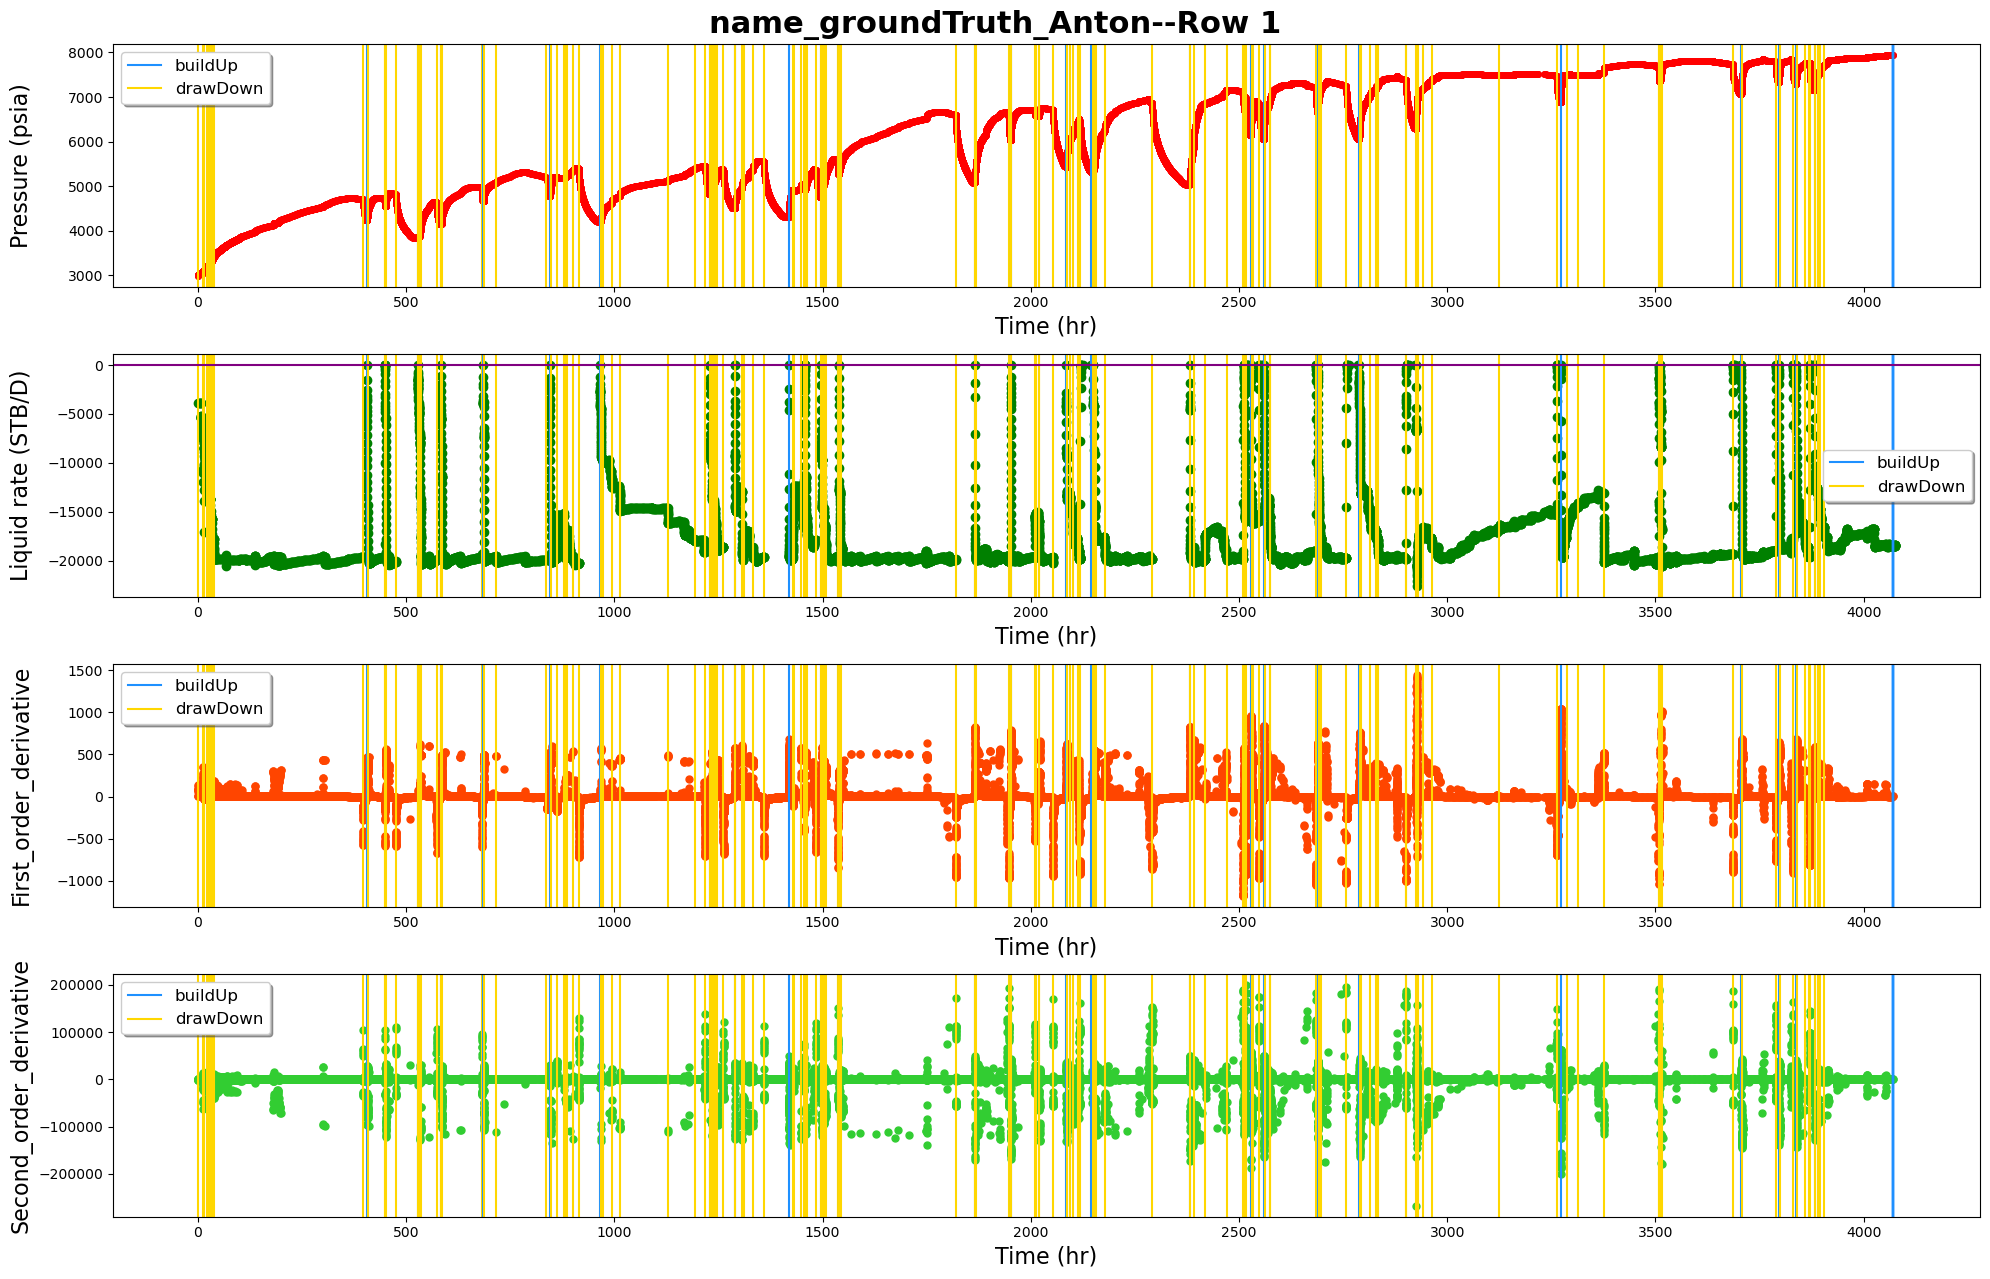

save whole....
detected 181 points as breakpoints
The plot is devided into 25 rows
------row 1-----detected points:[1, 32, 272, 384, 443, 526, 608, 722]


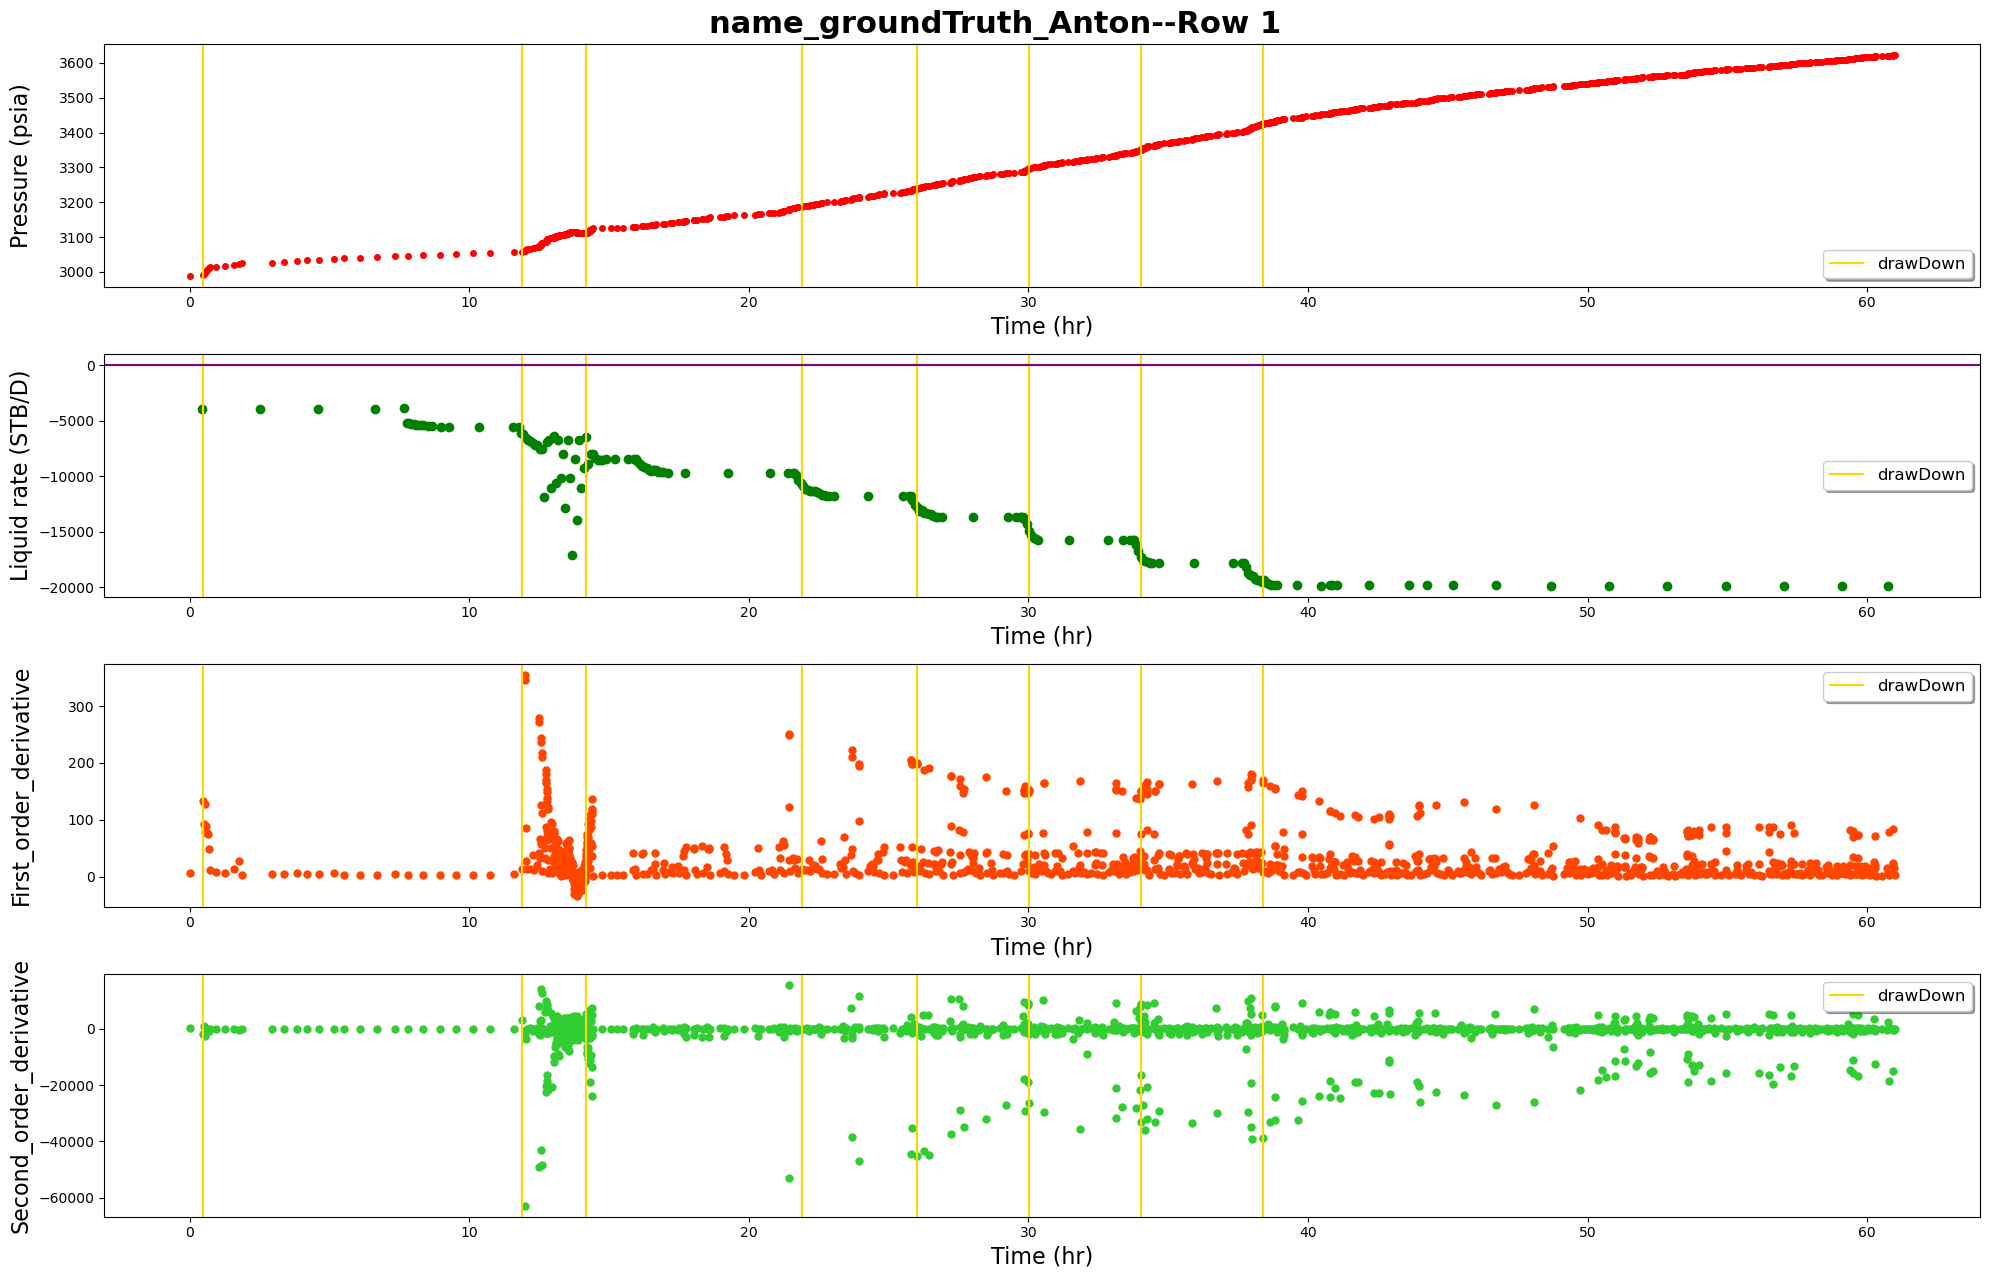

------row 2-----detected points:[2252]


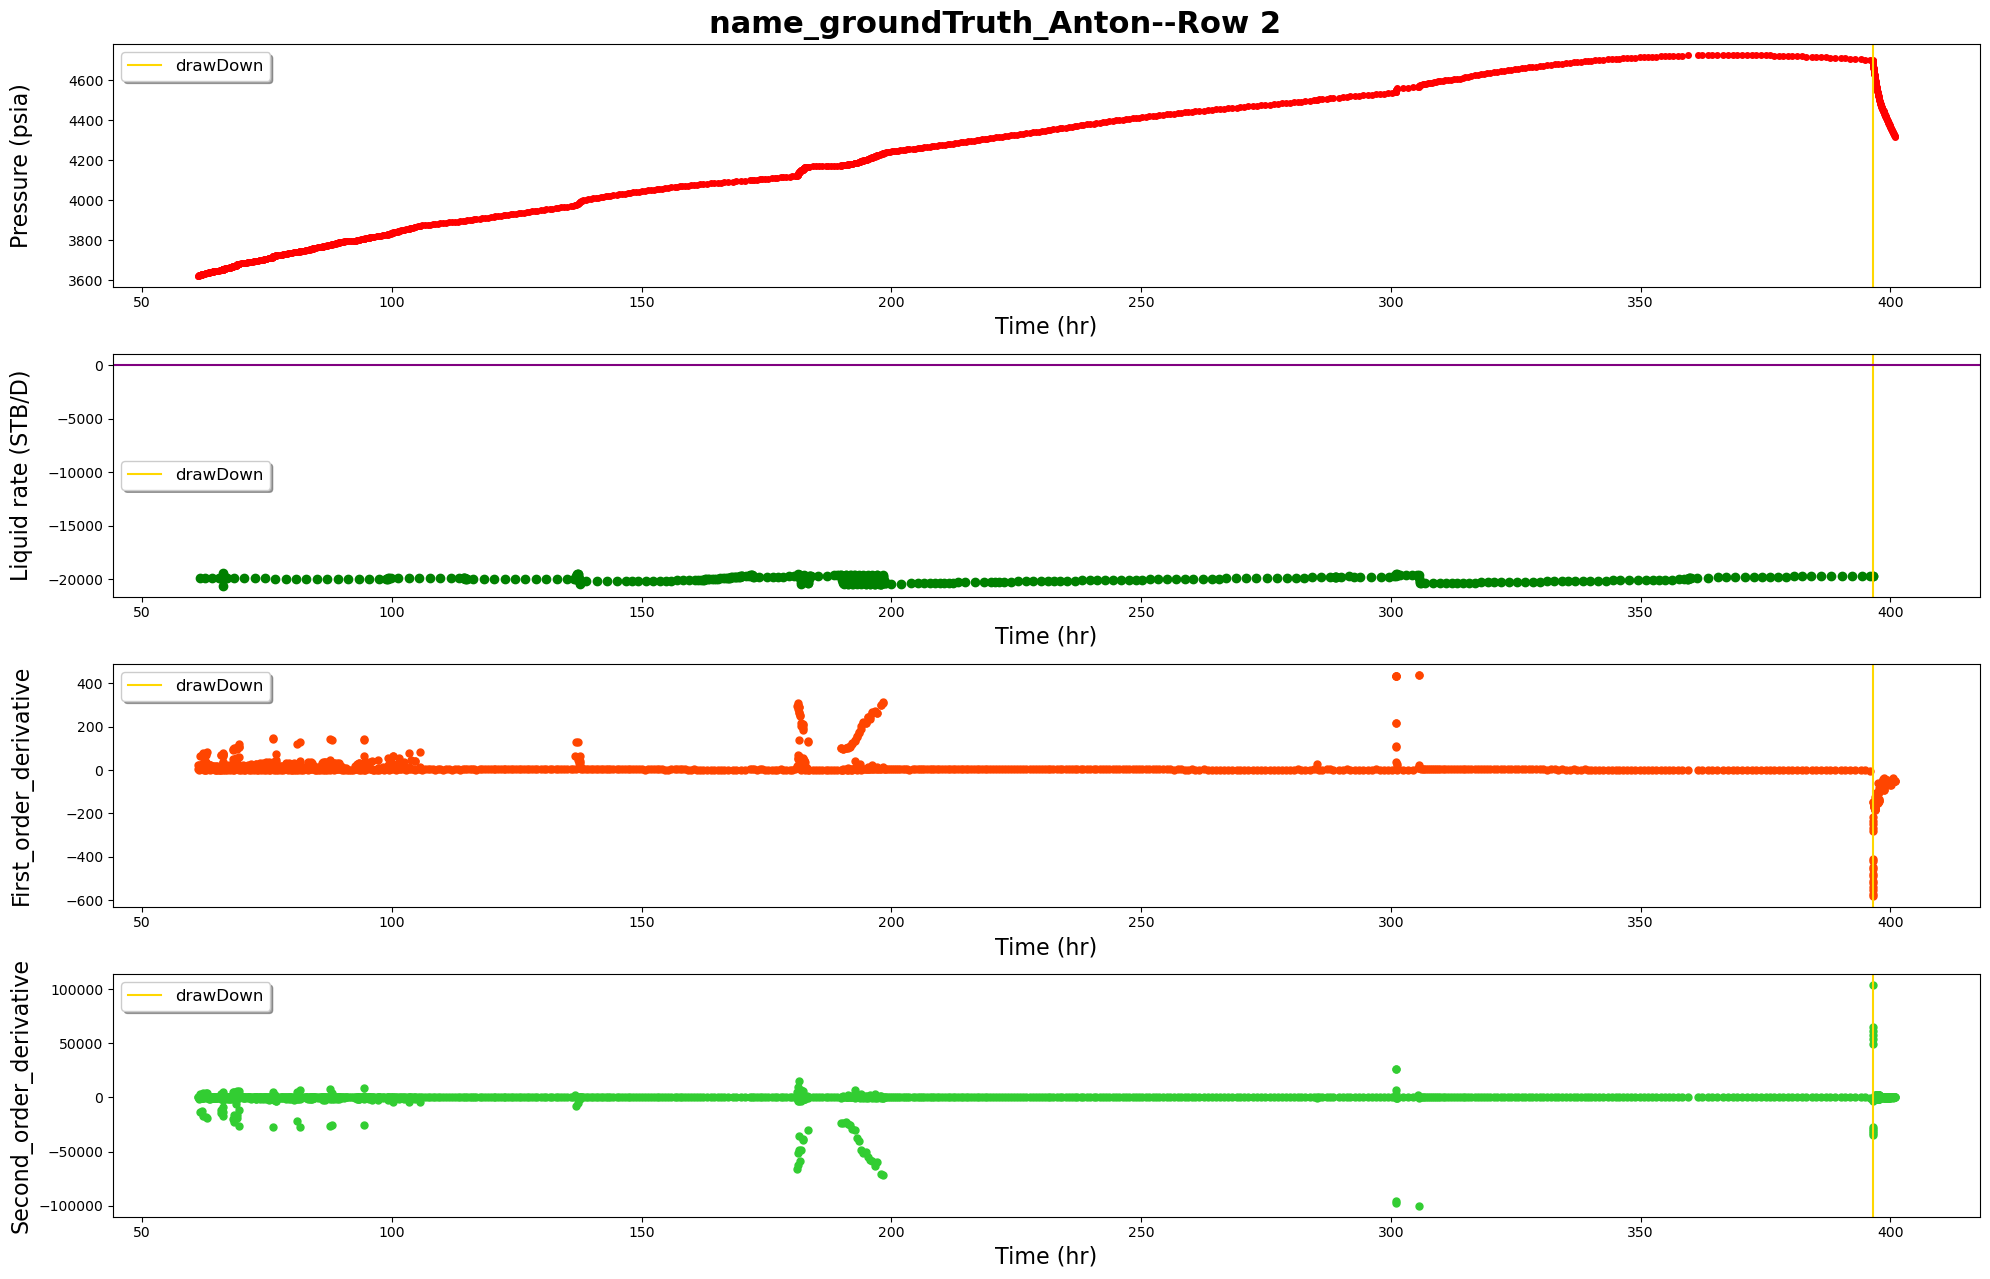

------row 3-----detected points:[2473, 2574, 2812, 2879, 2943, 3095, 3564, 3584, 3589]


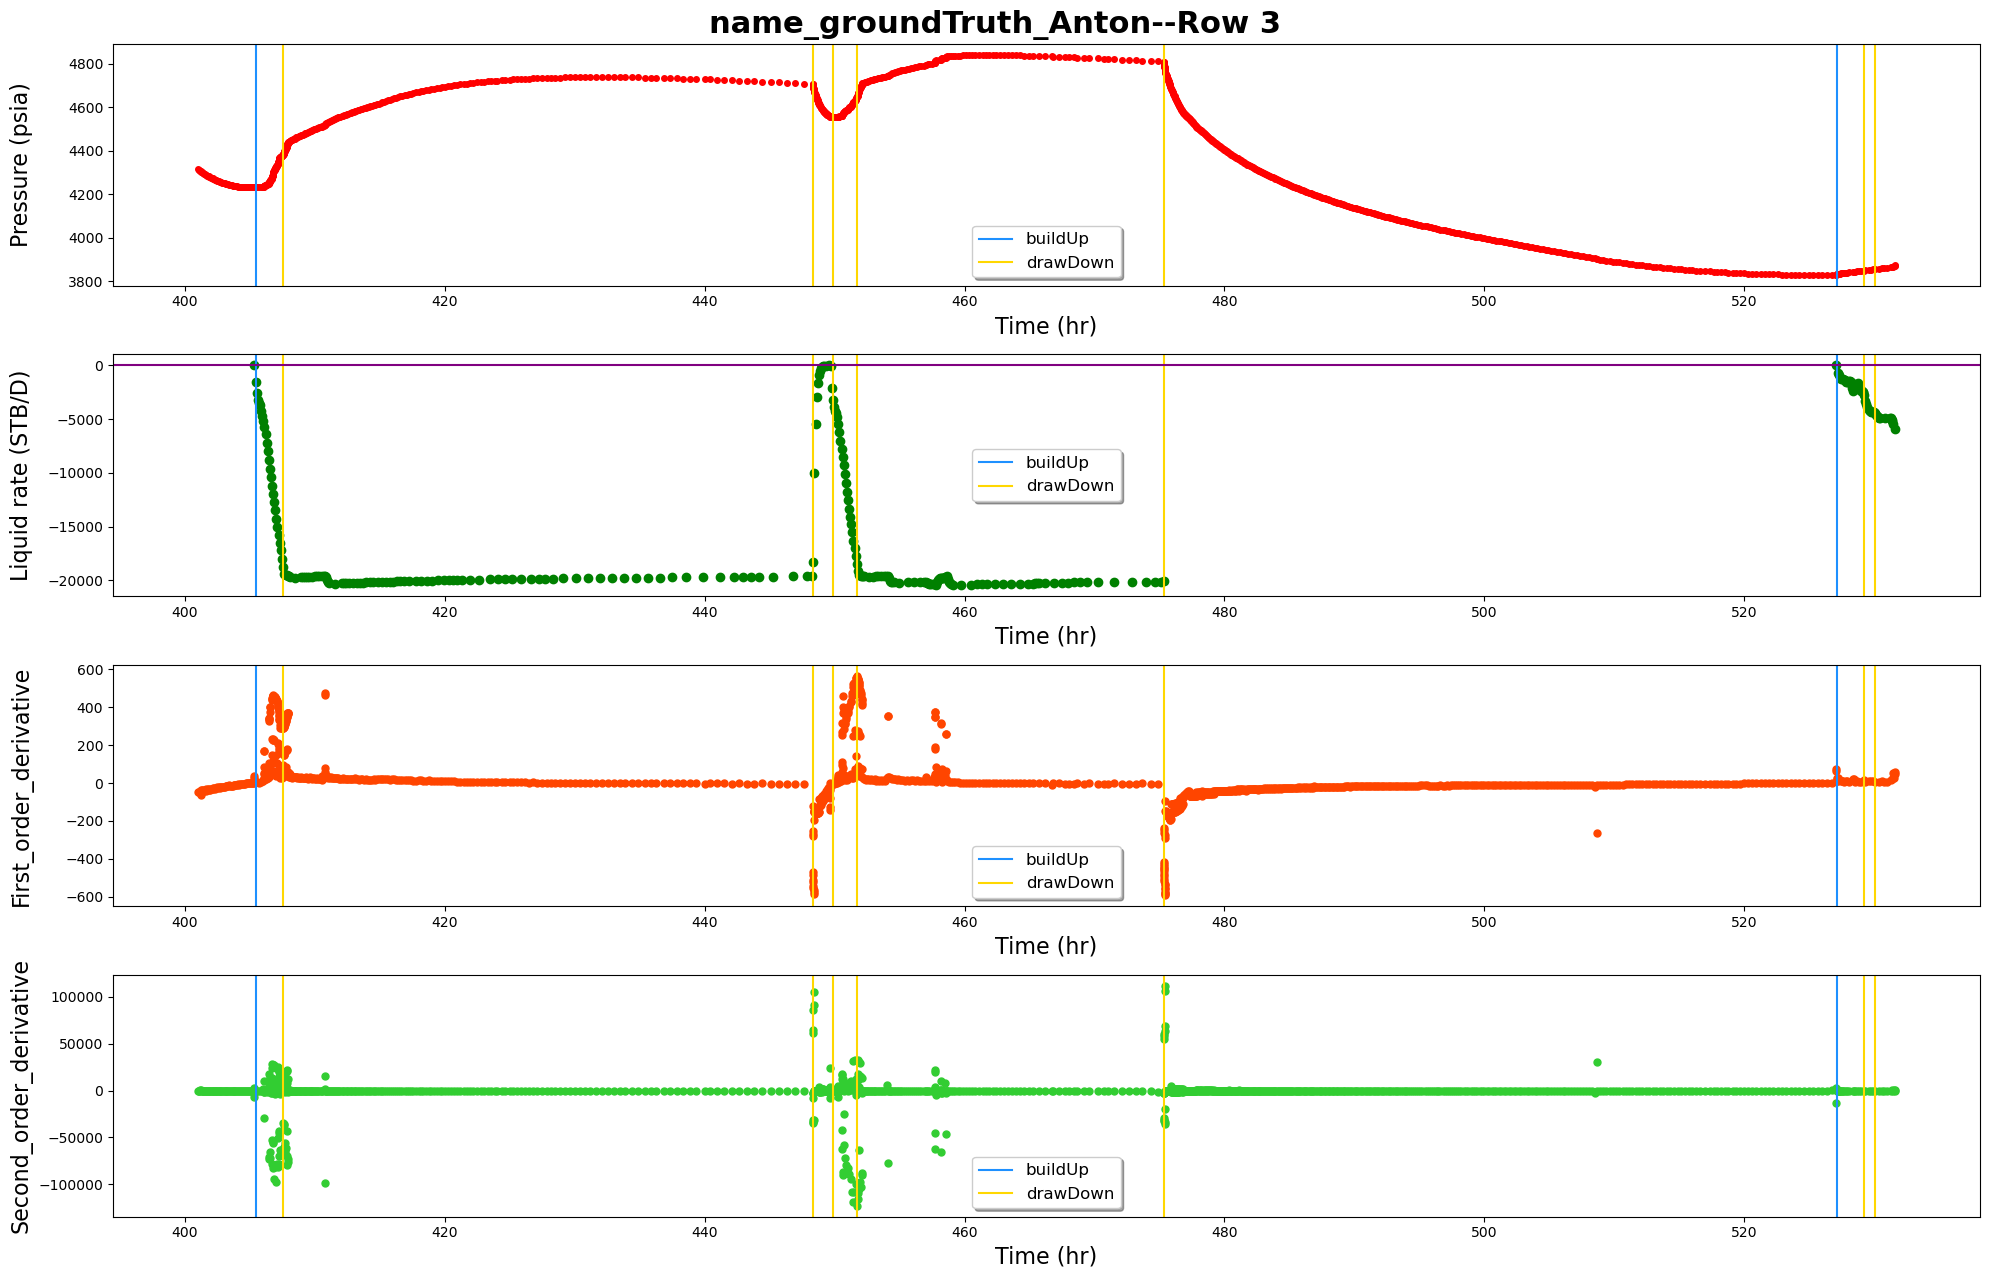

------row 4-----detected points:[3604, 3626, 3702, 3999, 4228, 4255, 4347, 4765]


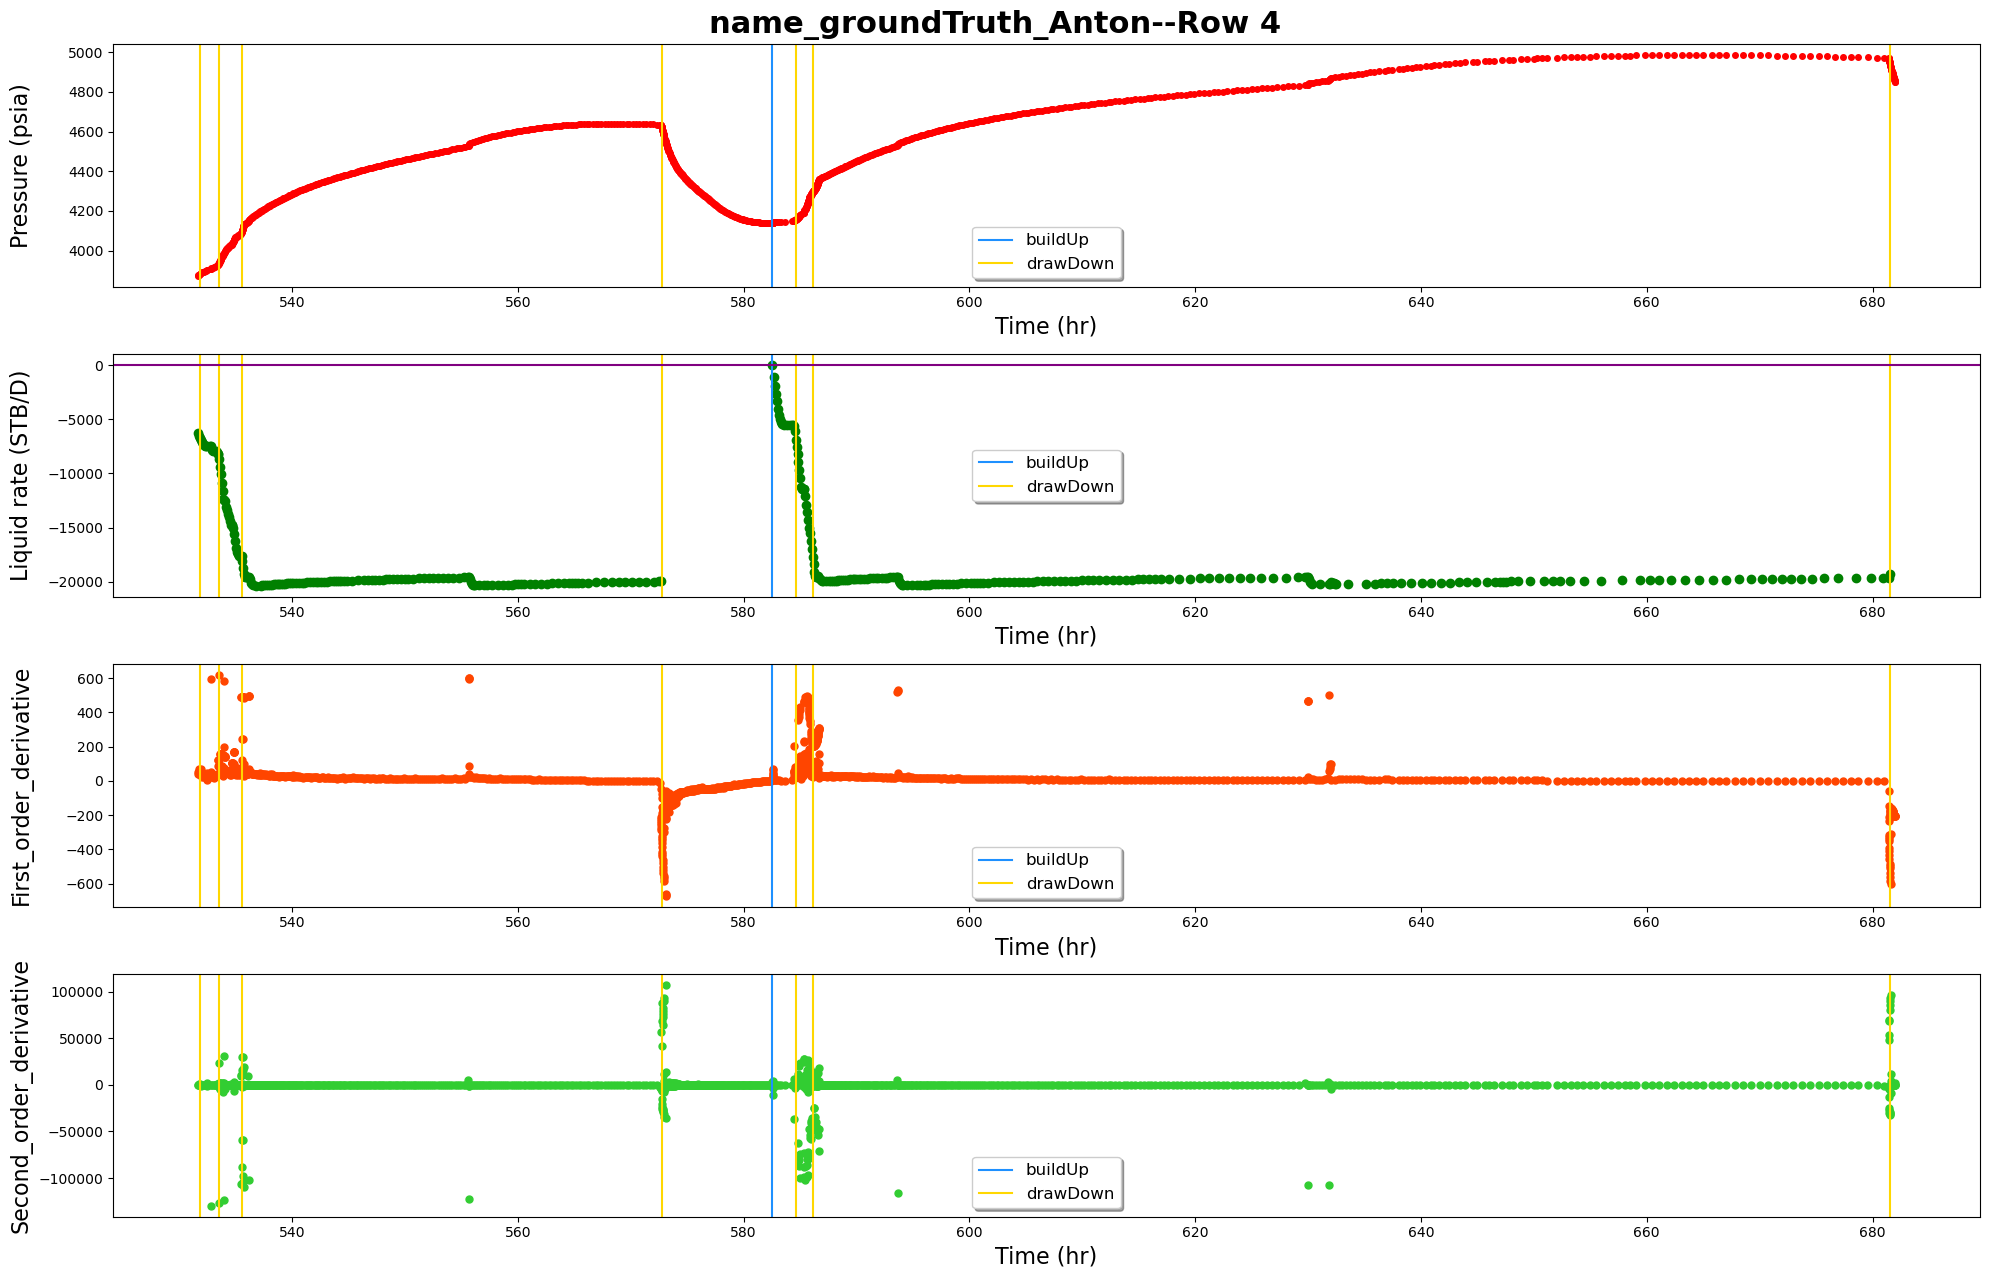

------row 5-----detected points:[4891, 4963, 5140, 5296, 5439, 5522, 5708, 5776, 5805, 5833, 5922, 5985]


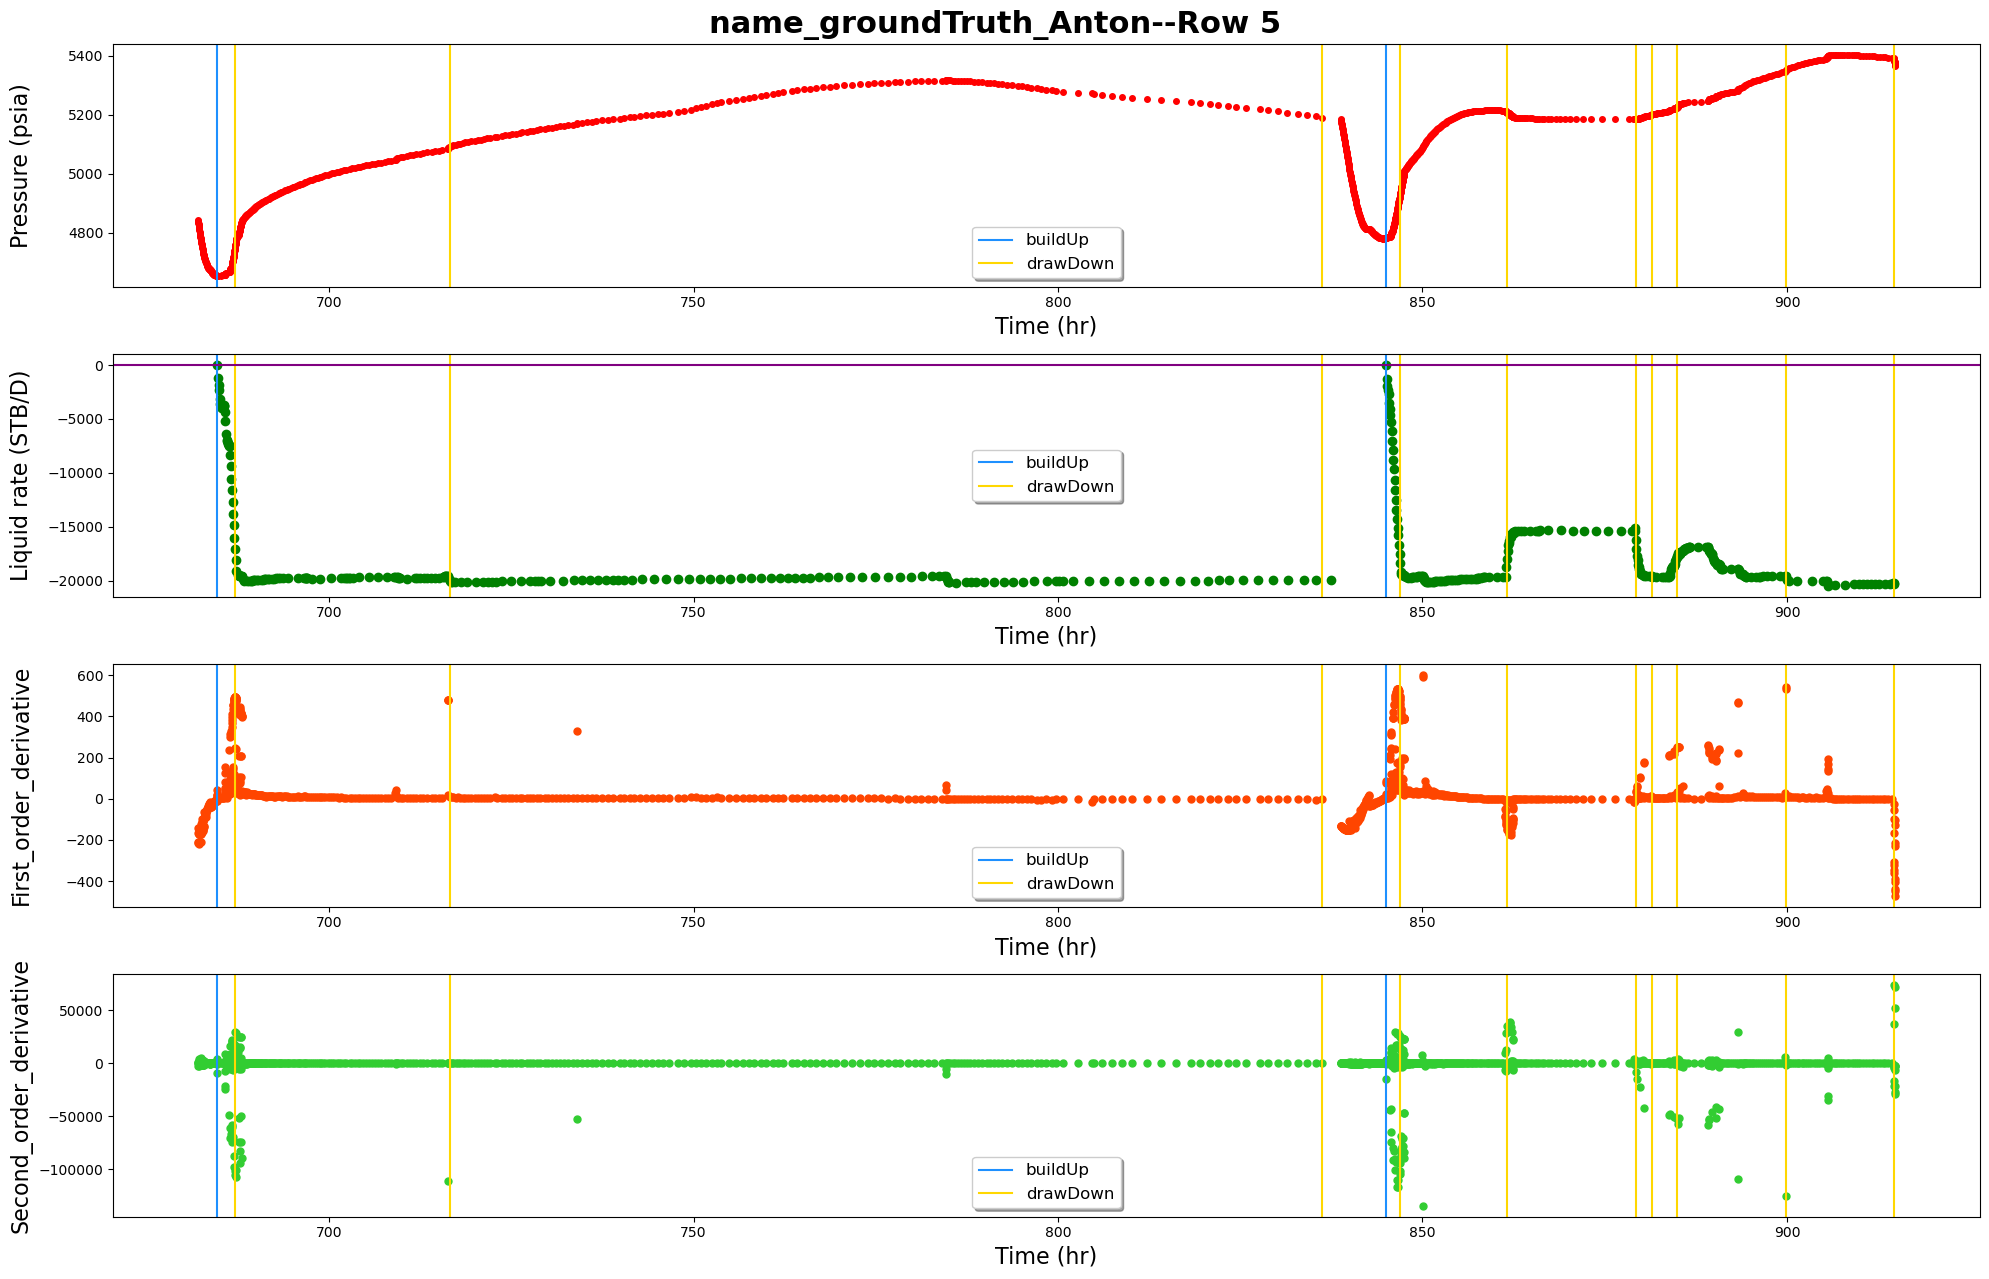

------row 6-----detected points:[6563, 6592, 6653, 6779, 6879, 7046, 7183]


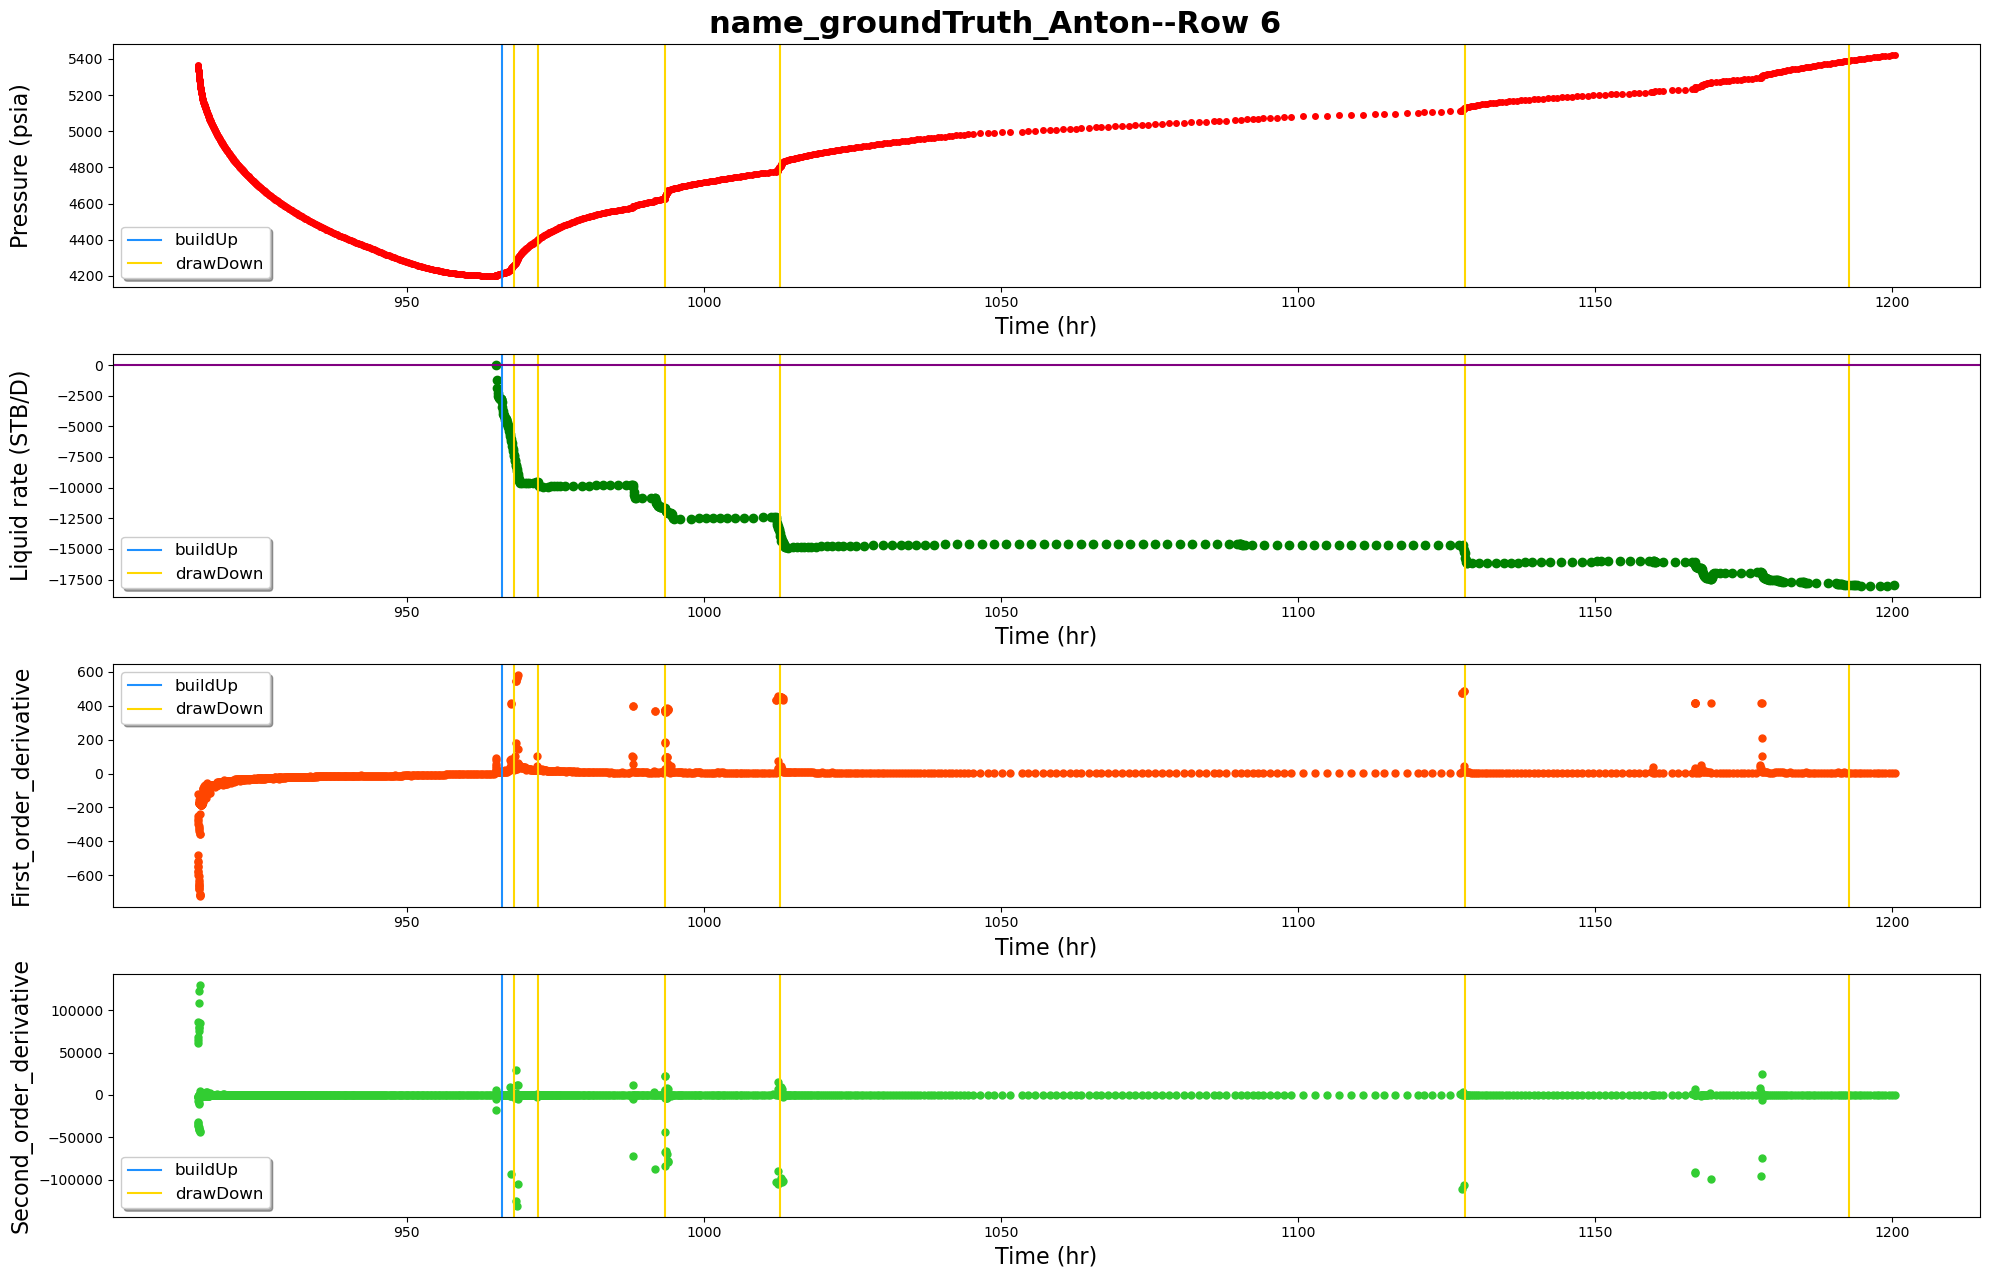

------row 7-----detected points:[7265, 7547, 7571, 7600, 7630, 7660, 7744, 7820, 7953, 8364]


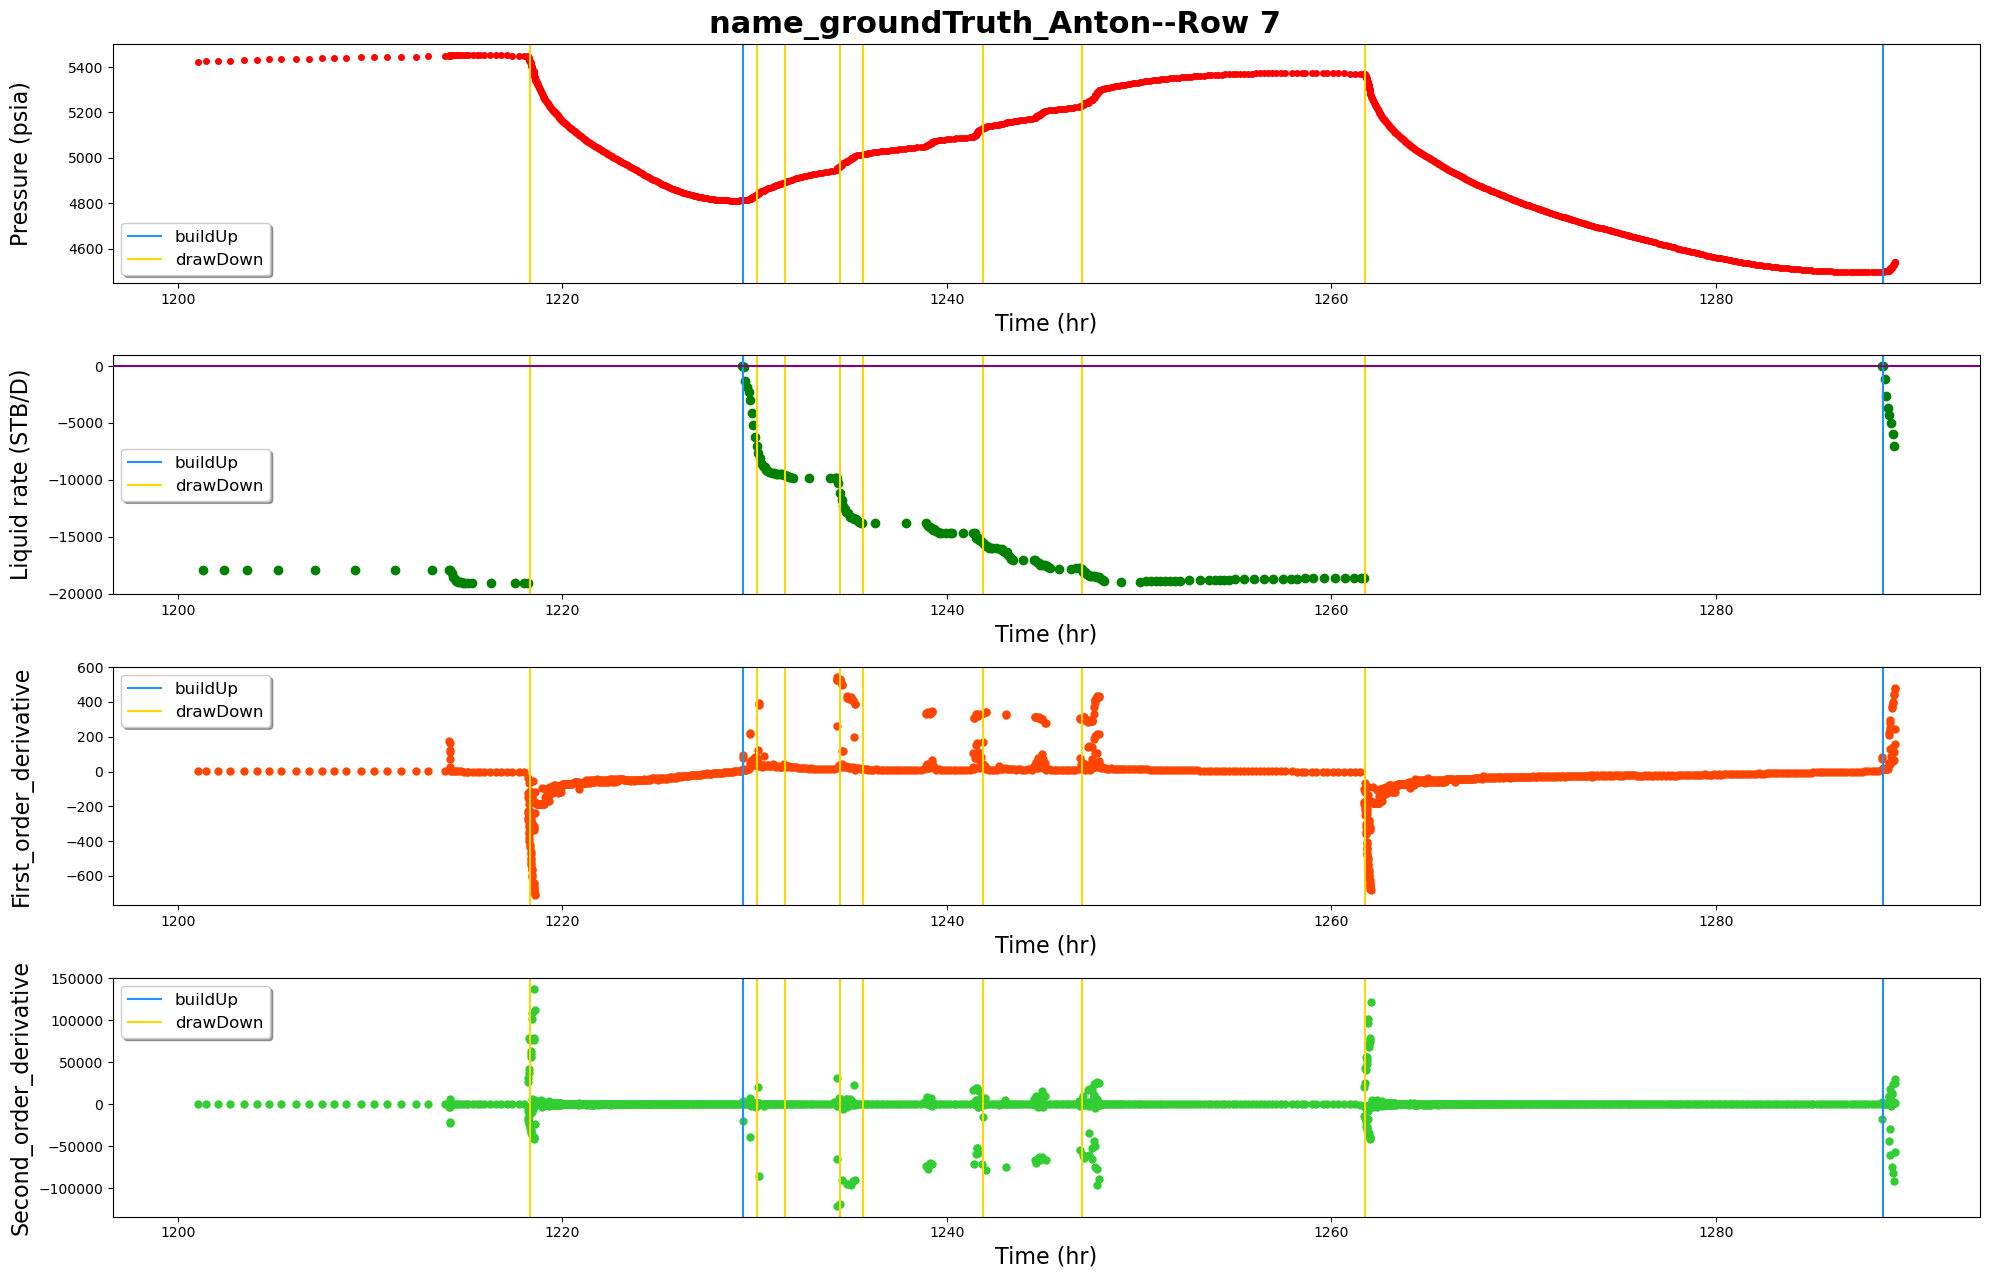

------row 8-----detected points:[8440, 8632, 8723, 8876, 9023]


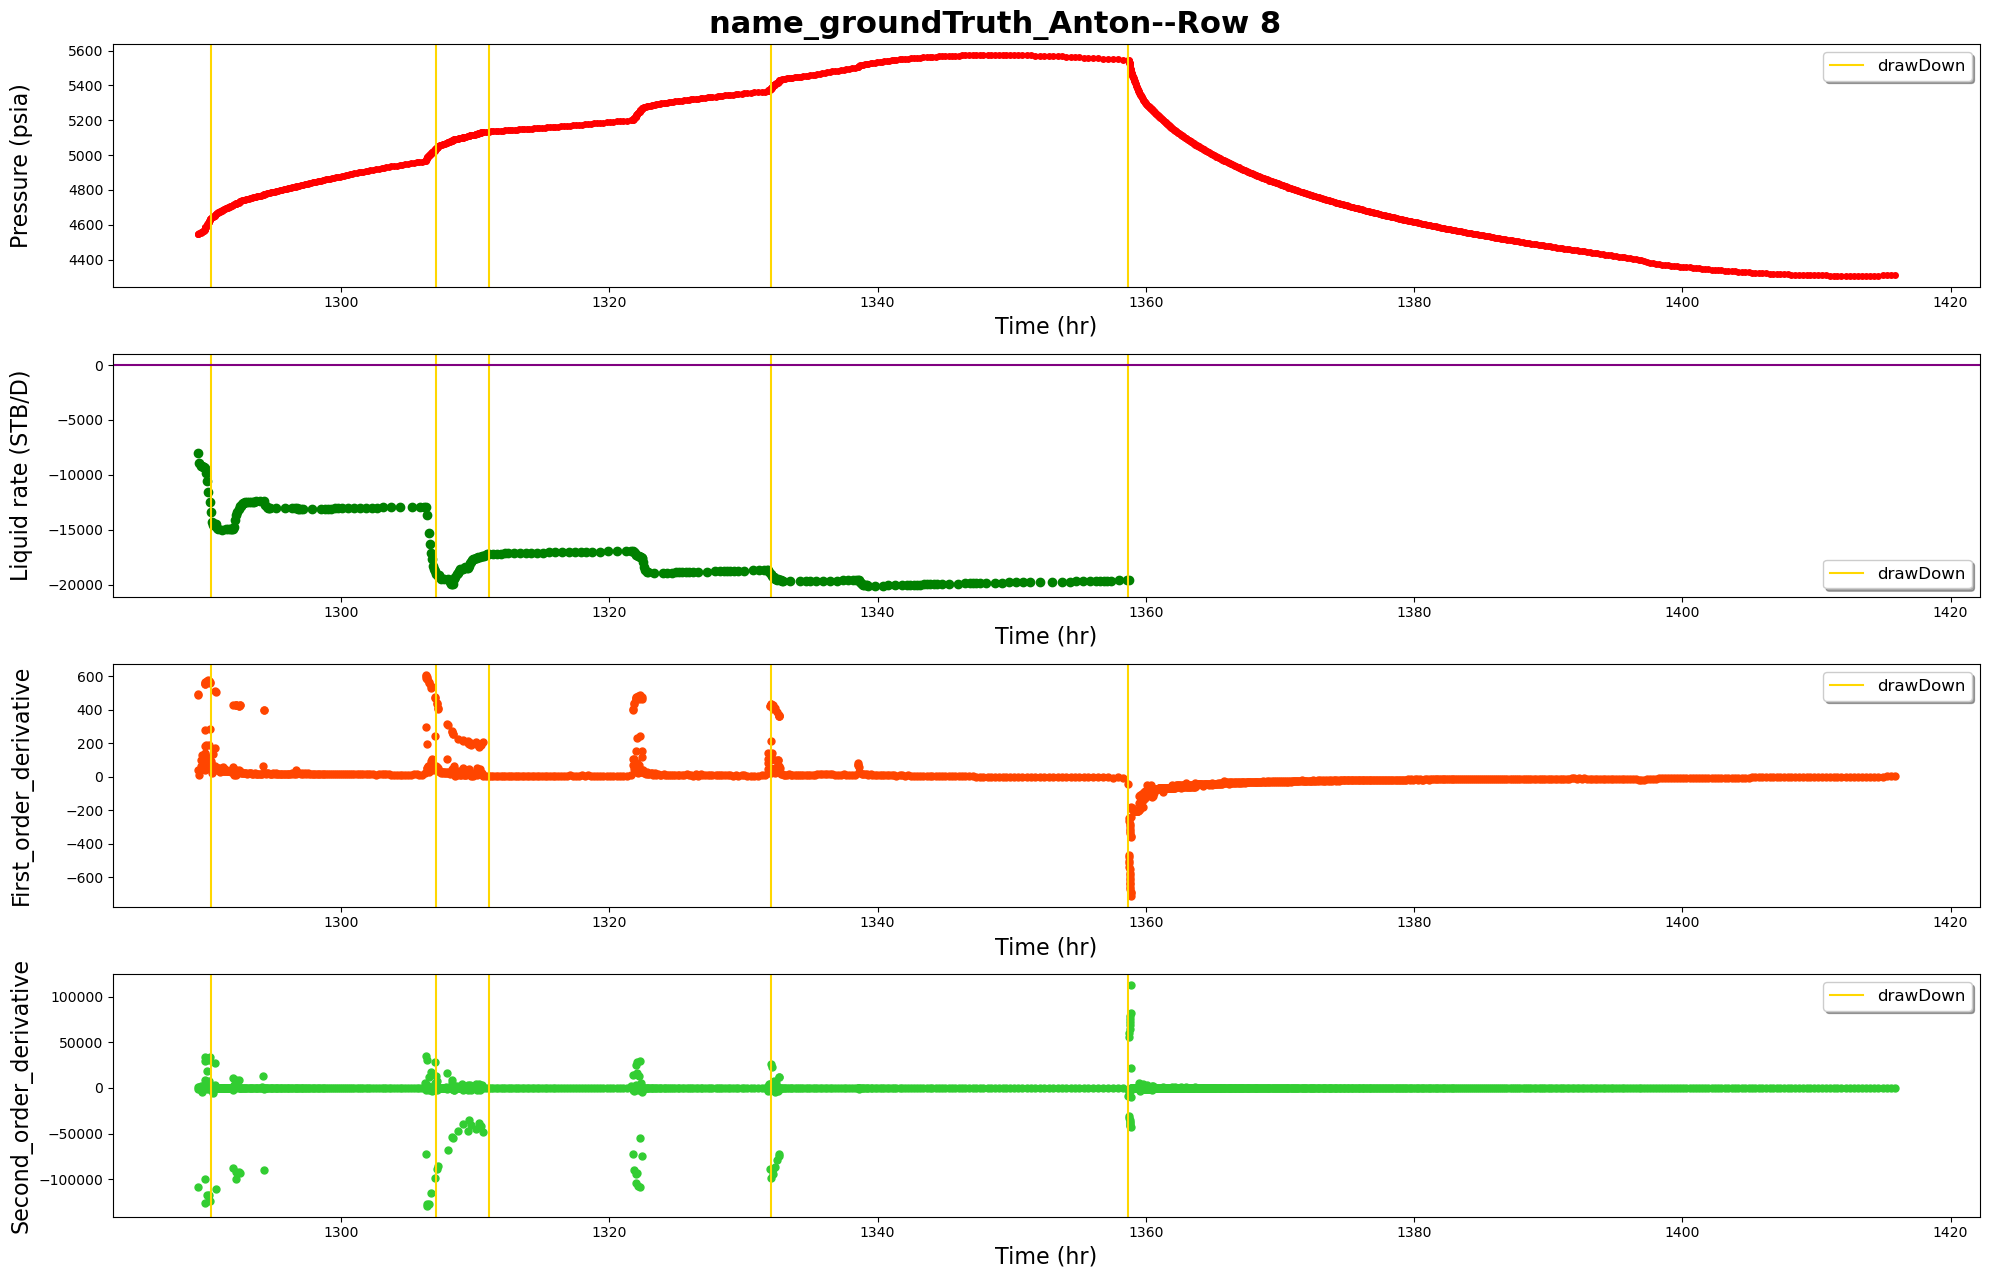

------row 9-----detected points:[9614, 9987, 10019, 10079, 10151, 10217, 10273, 10325, 10526]


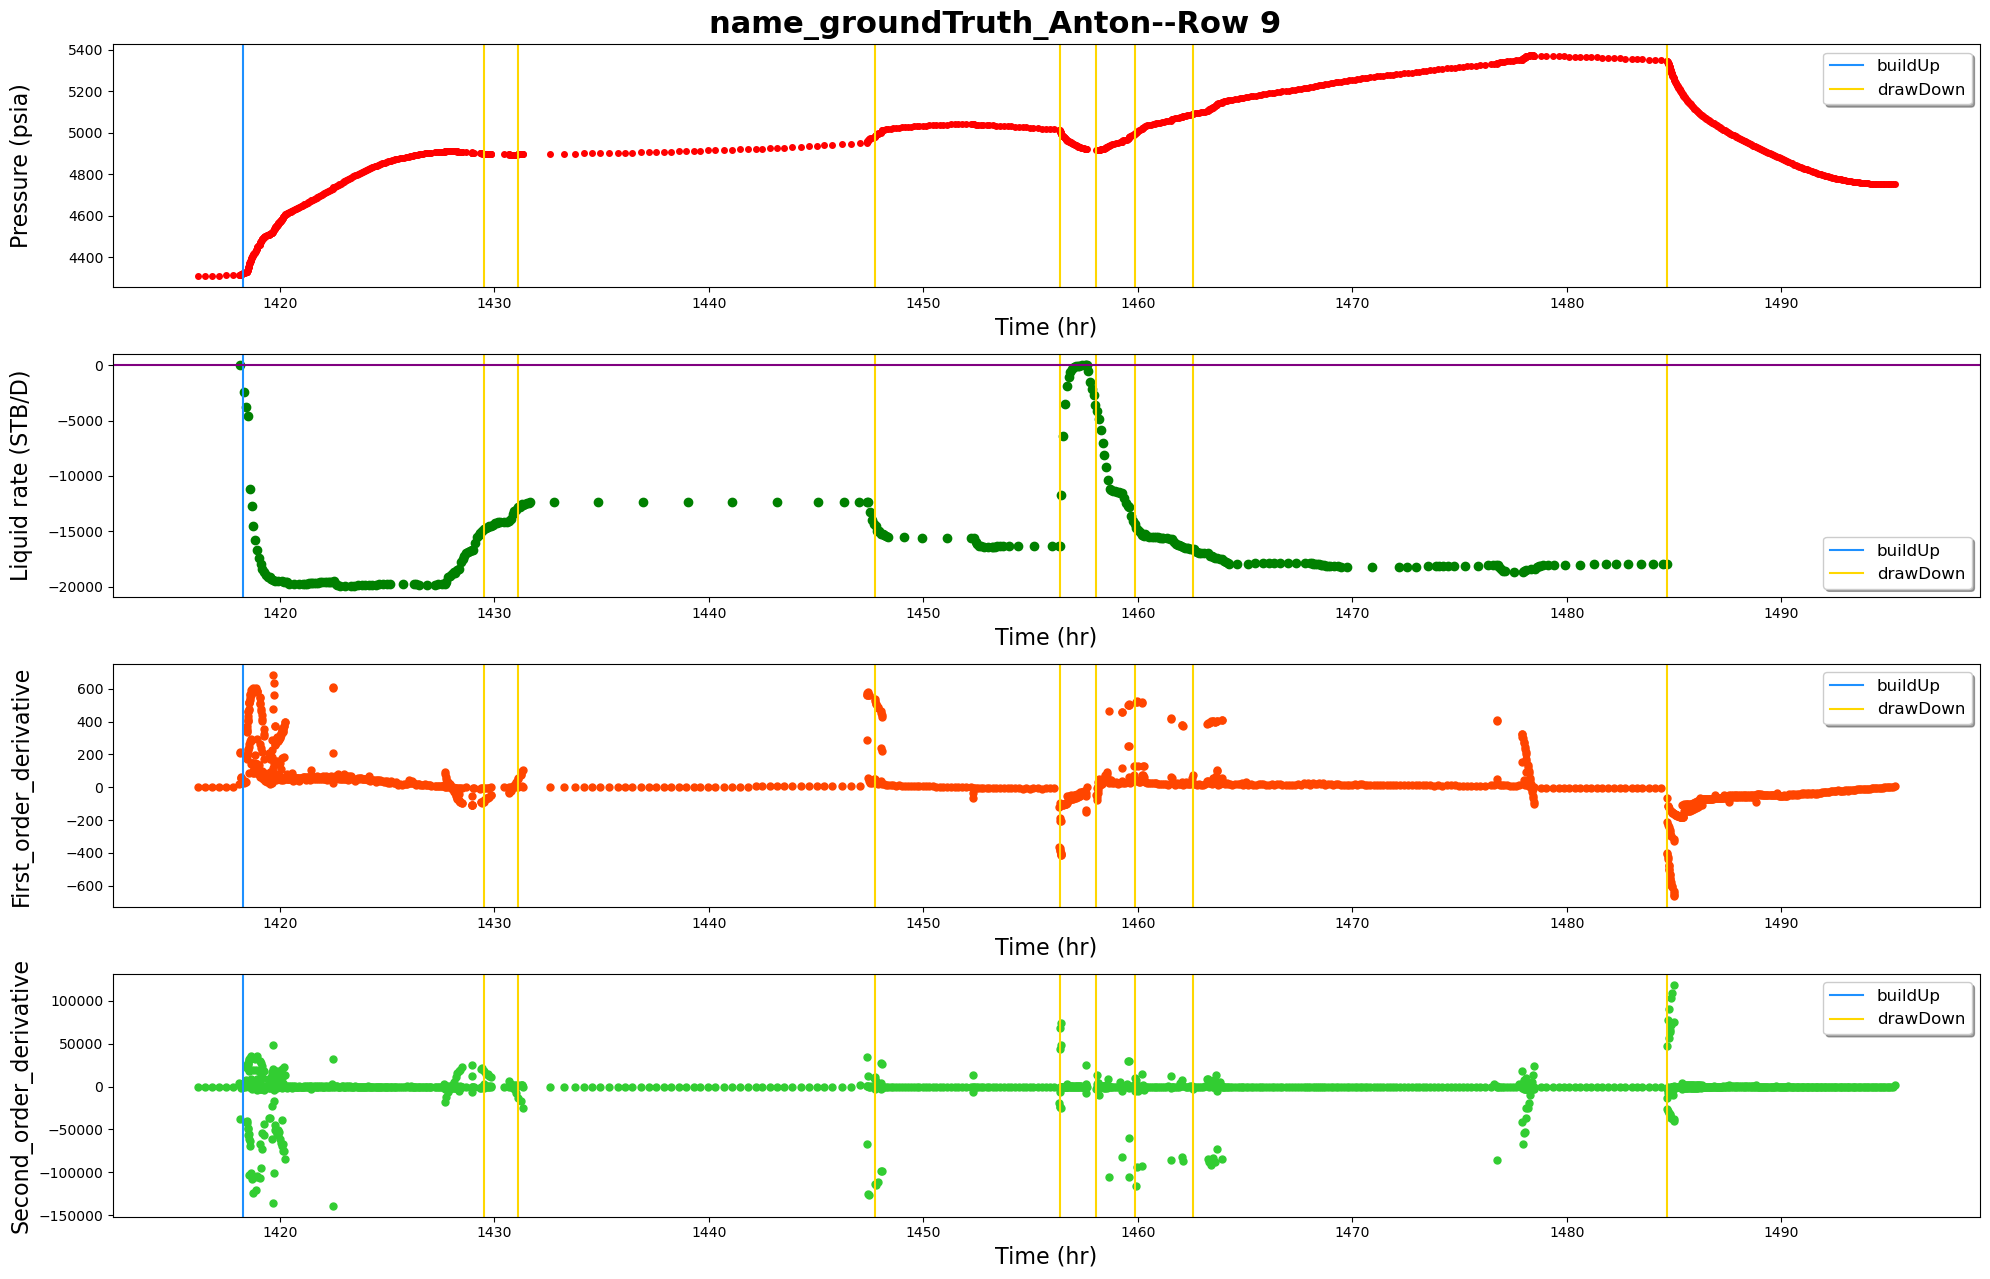

------row 10-----detected points:[10806, 10834, 10886, 10952, 11027, 11089, 11343, 11354, 11479, 11531, 11636, 11712]


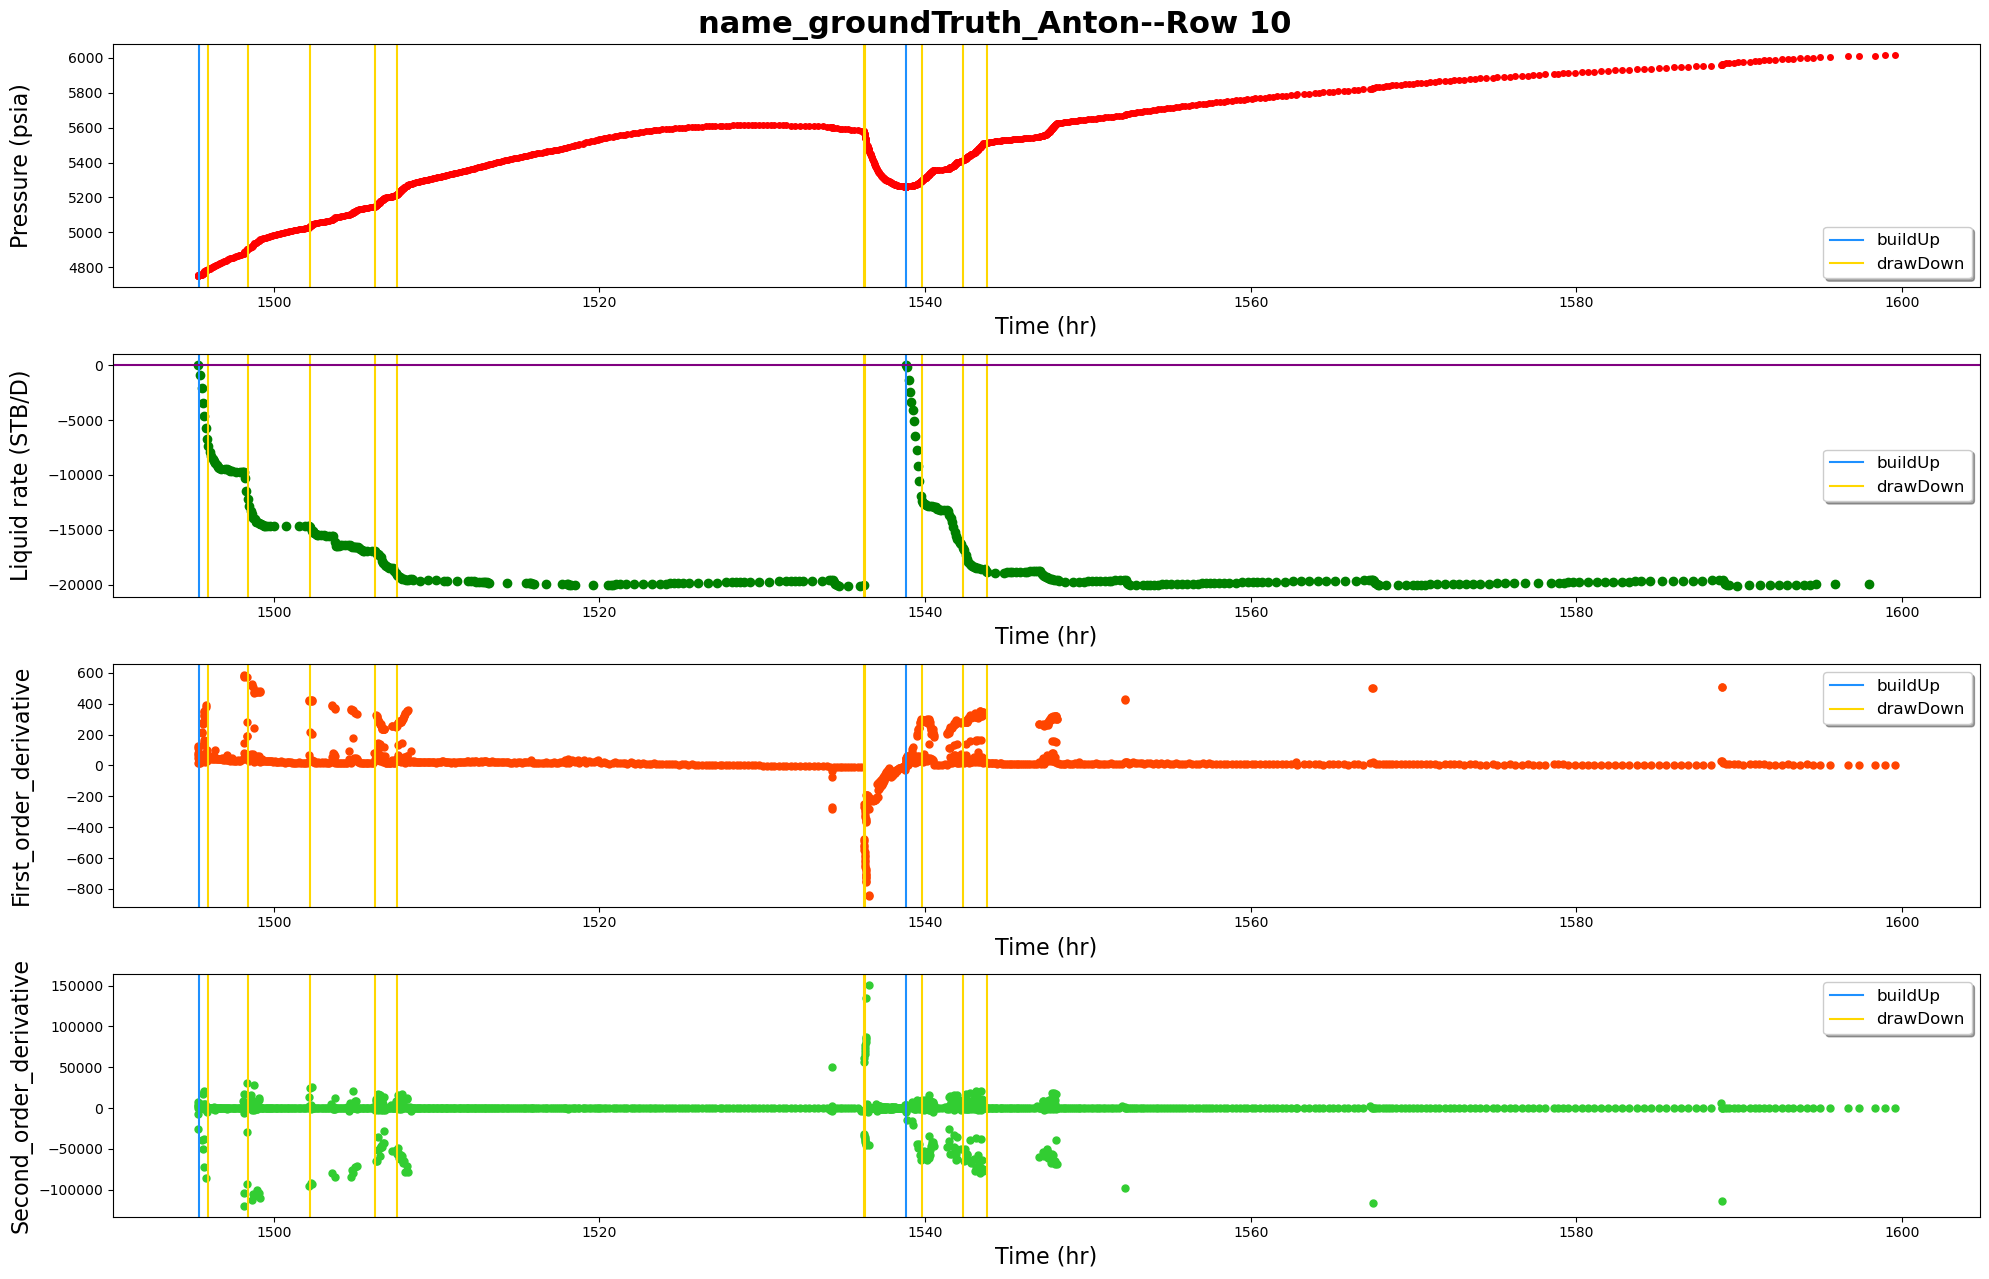

------row 11-----detected points:[12363, 13040, 13111]


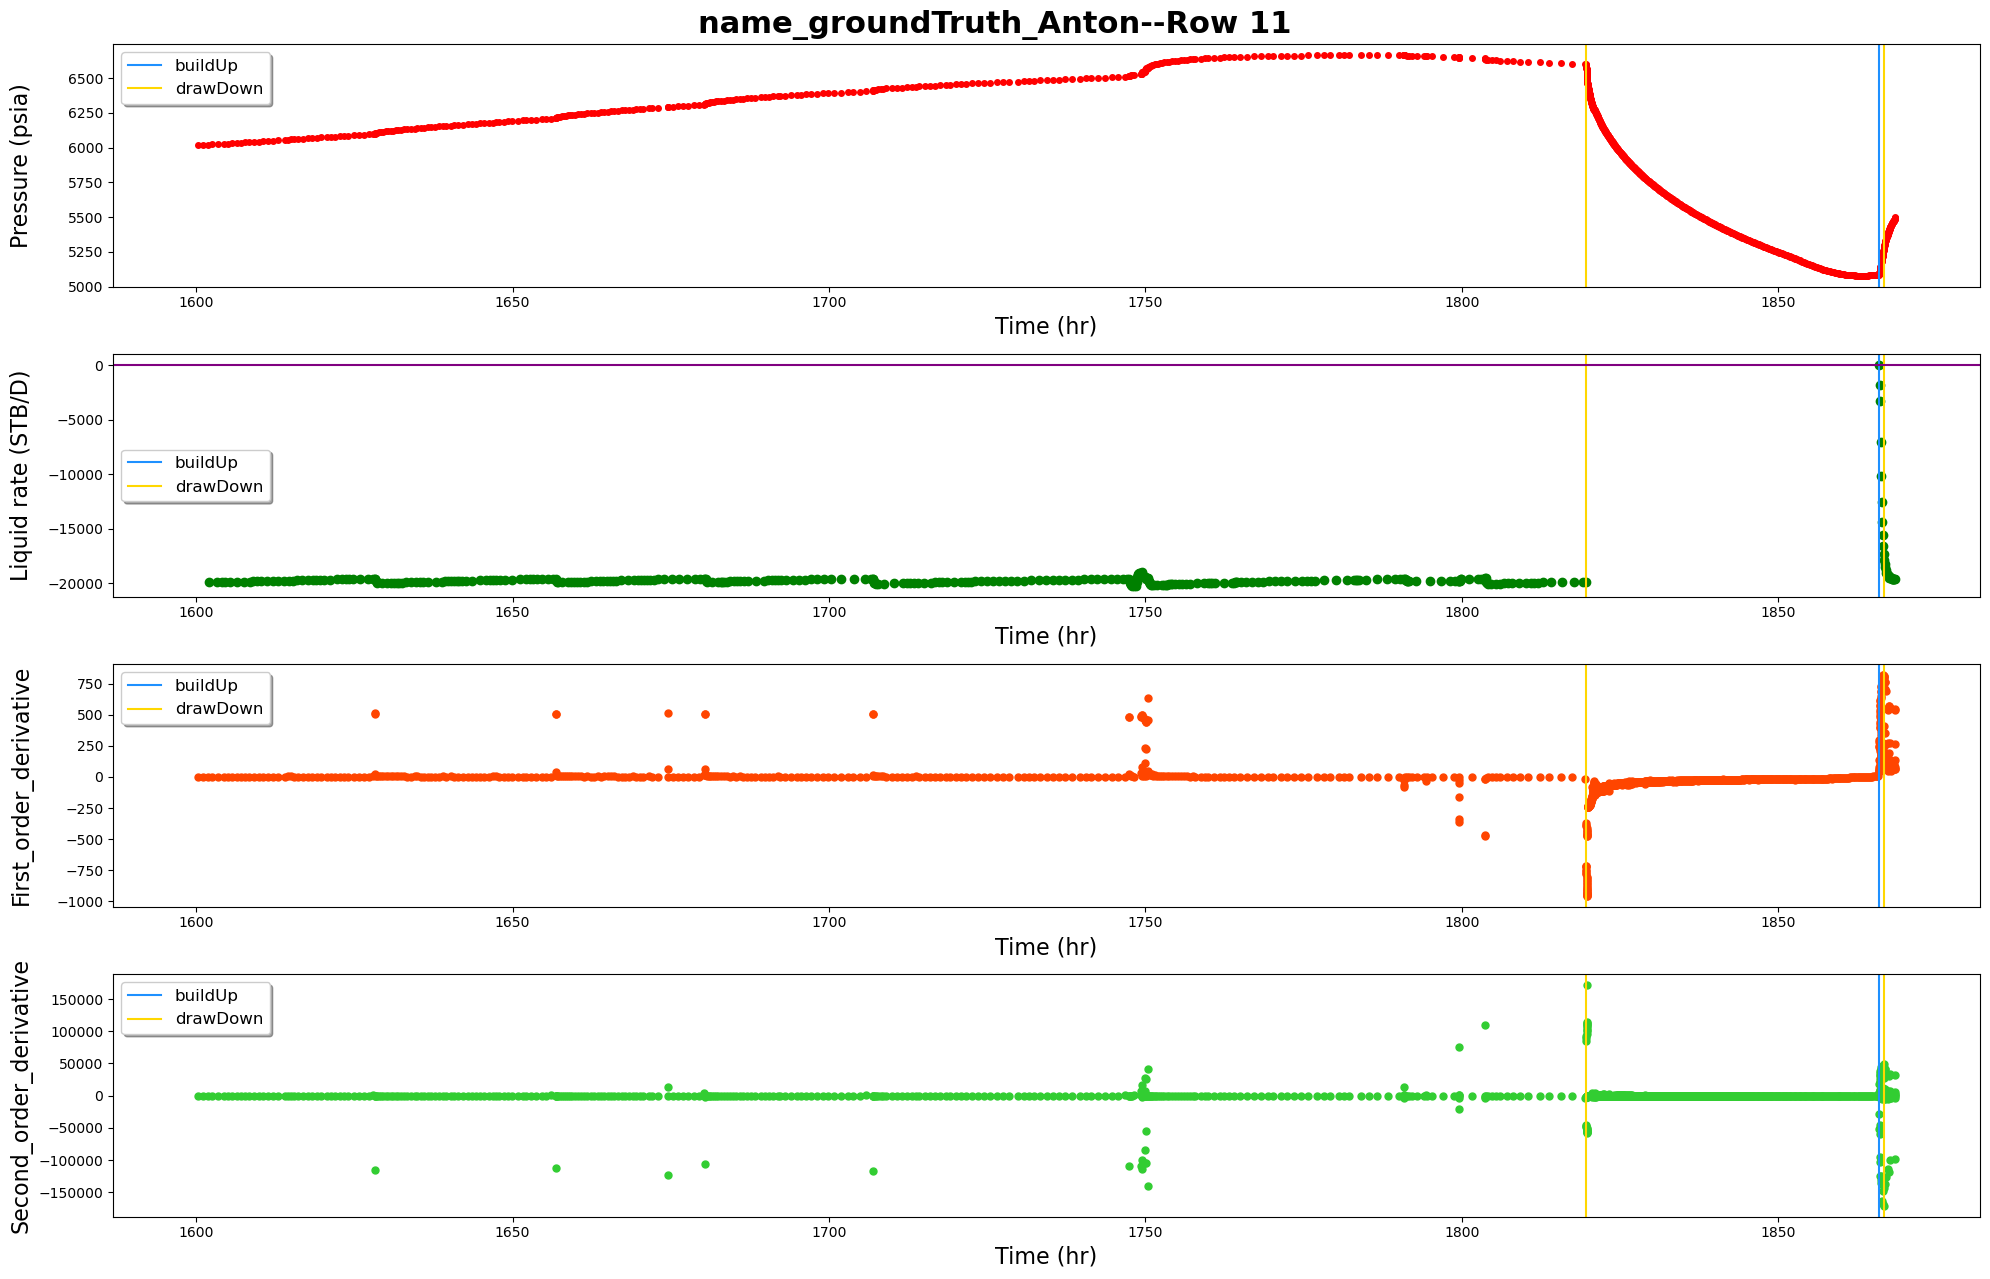

------row 12-----detected points:[13208, 13880, 14088, 14186]


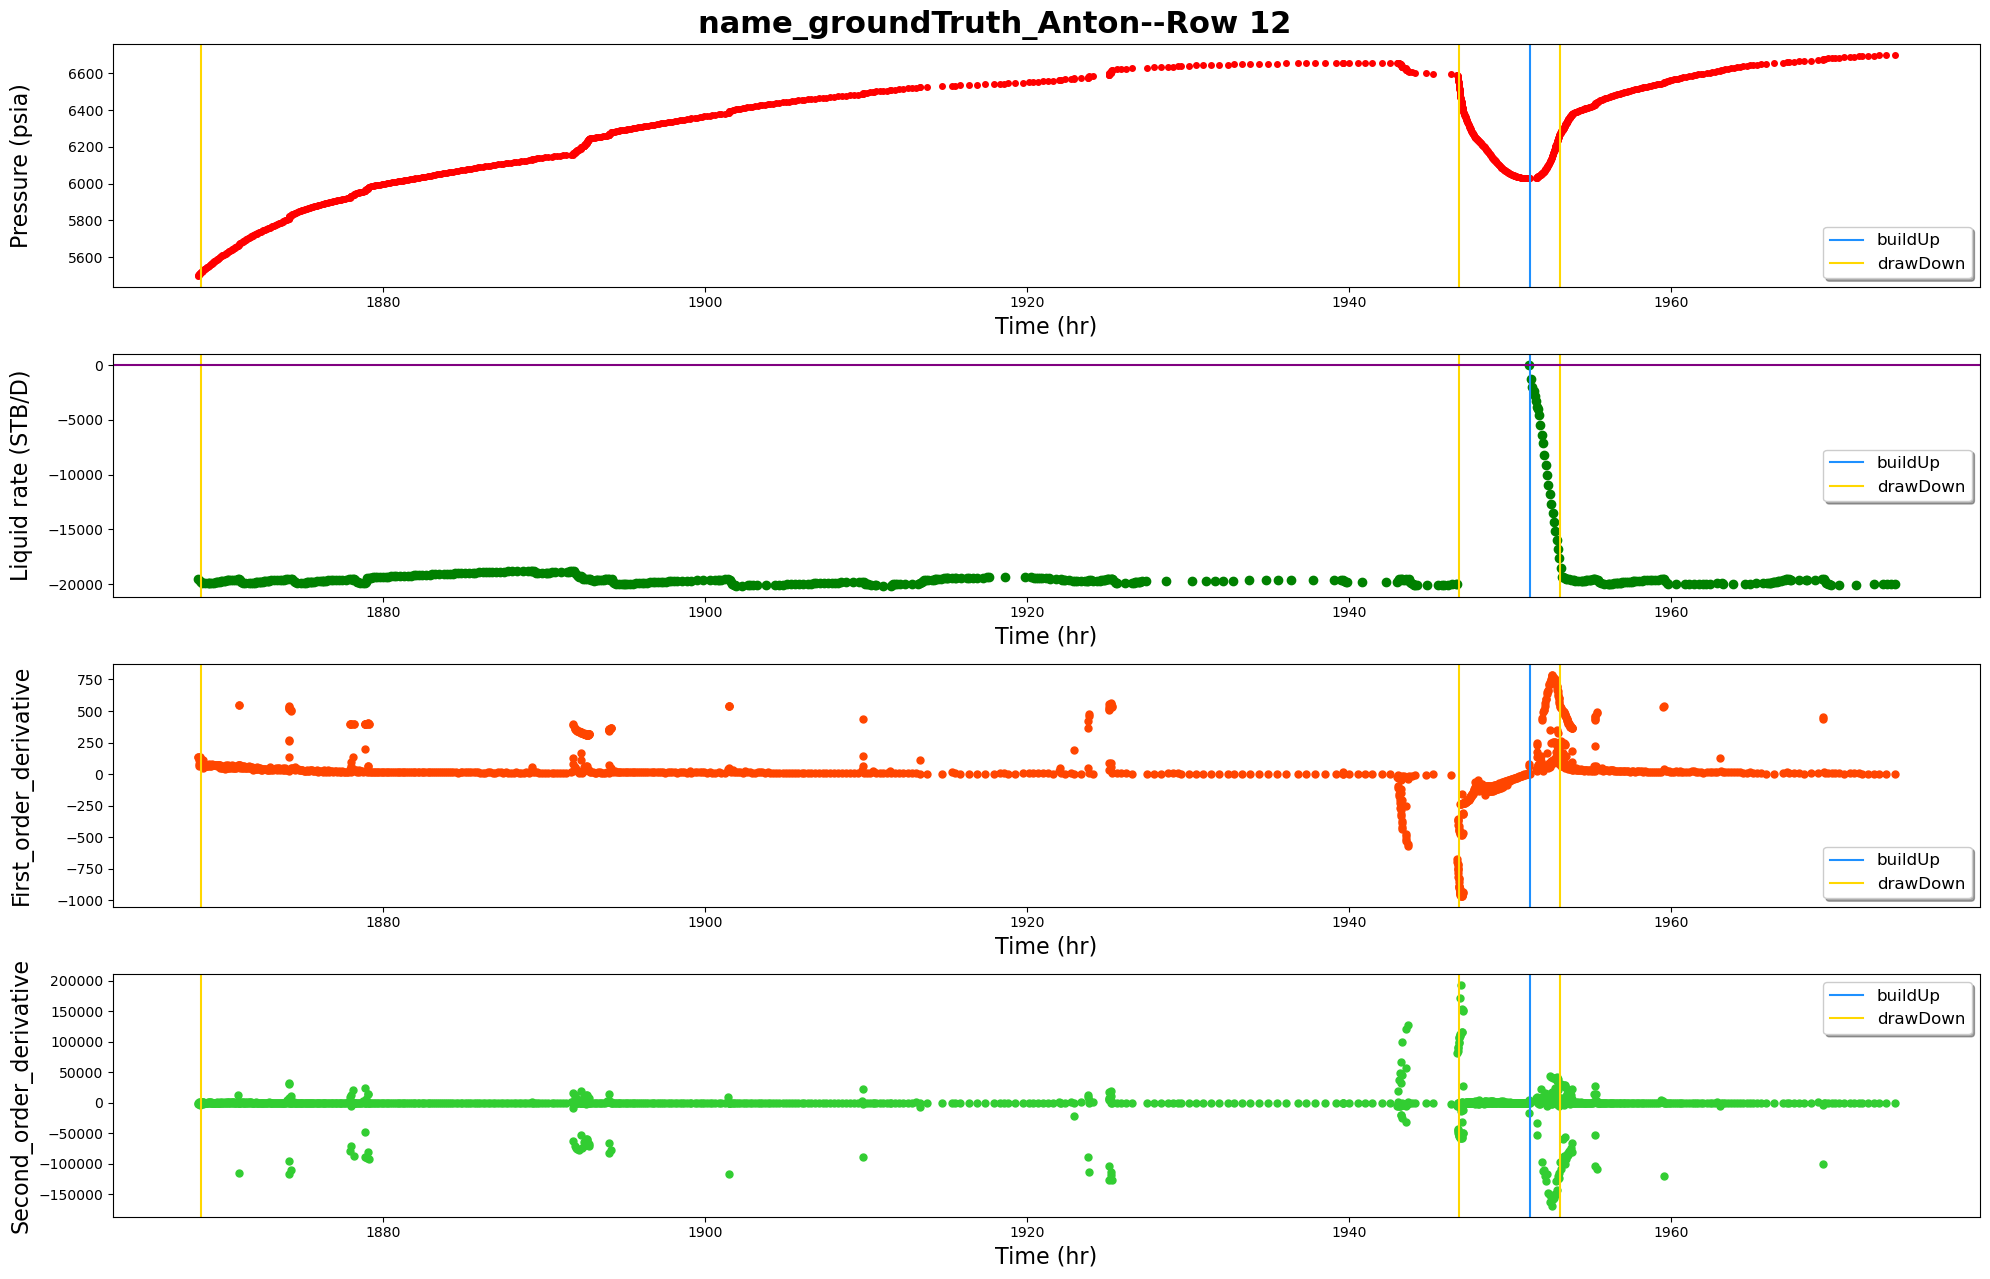

------row 13-----detected points:[14451, 14512, 14584, 14659, 14786, 15338, 15425]


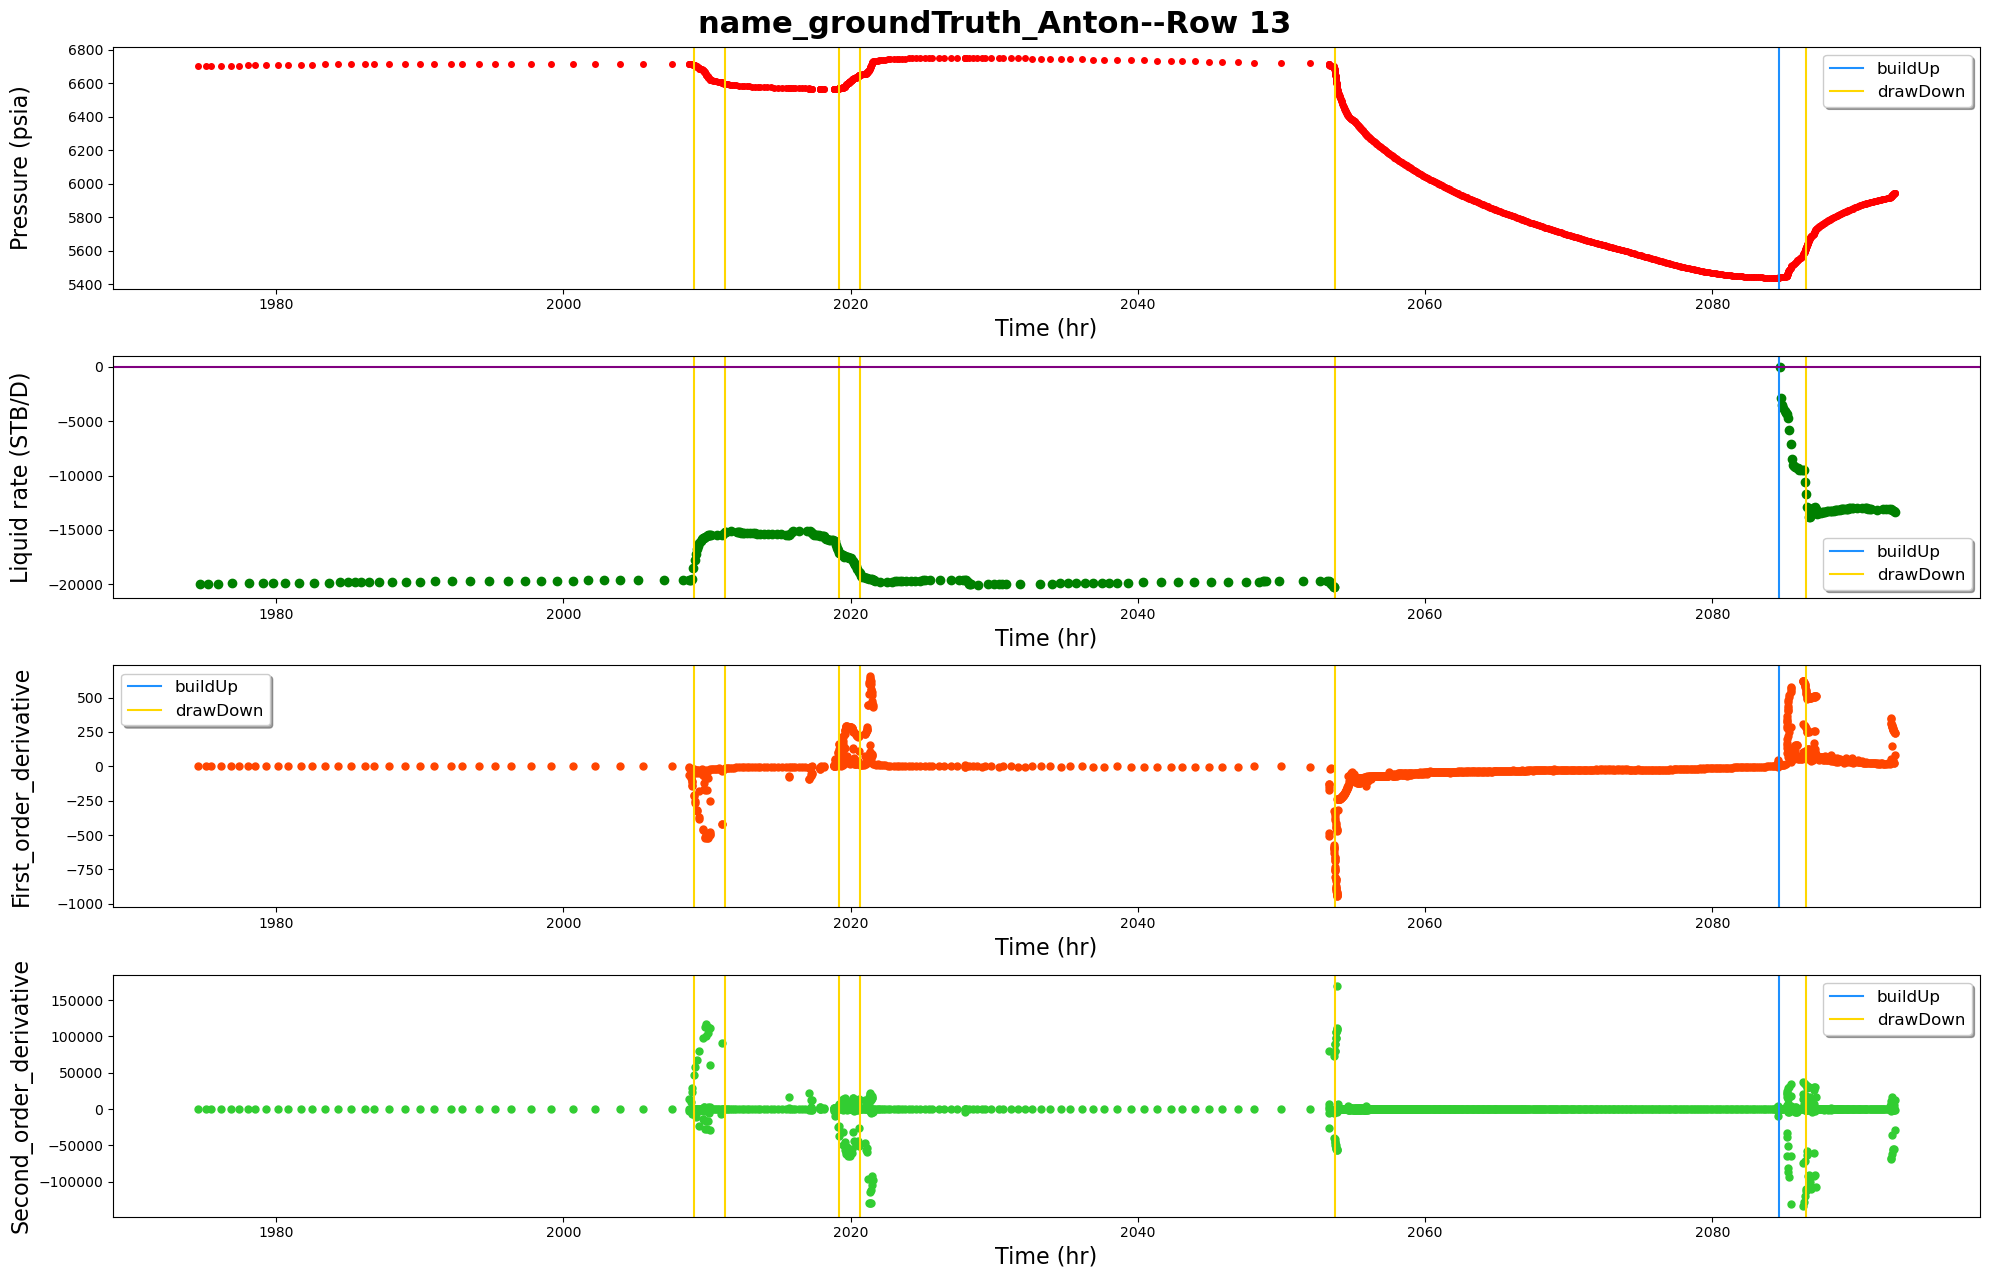

------row 14-----detected points:[15682, 15832, 15989, 16103, 16570, 16615, 16619, 16670]


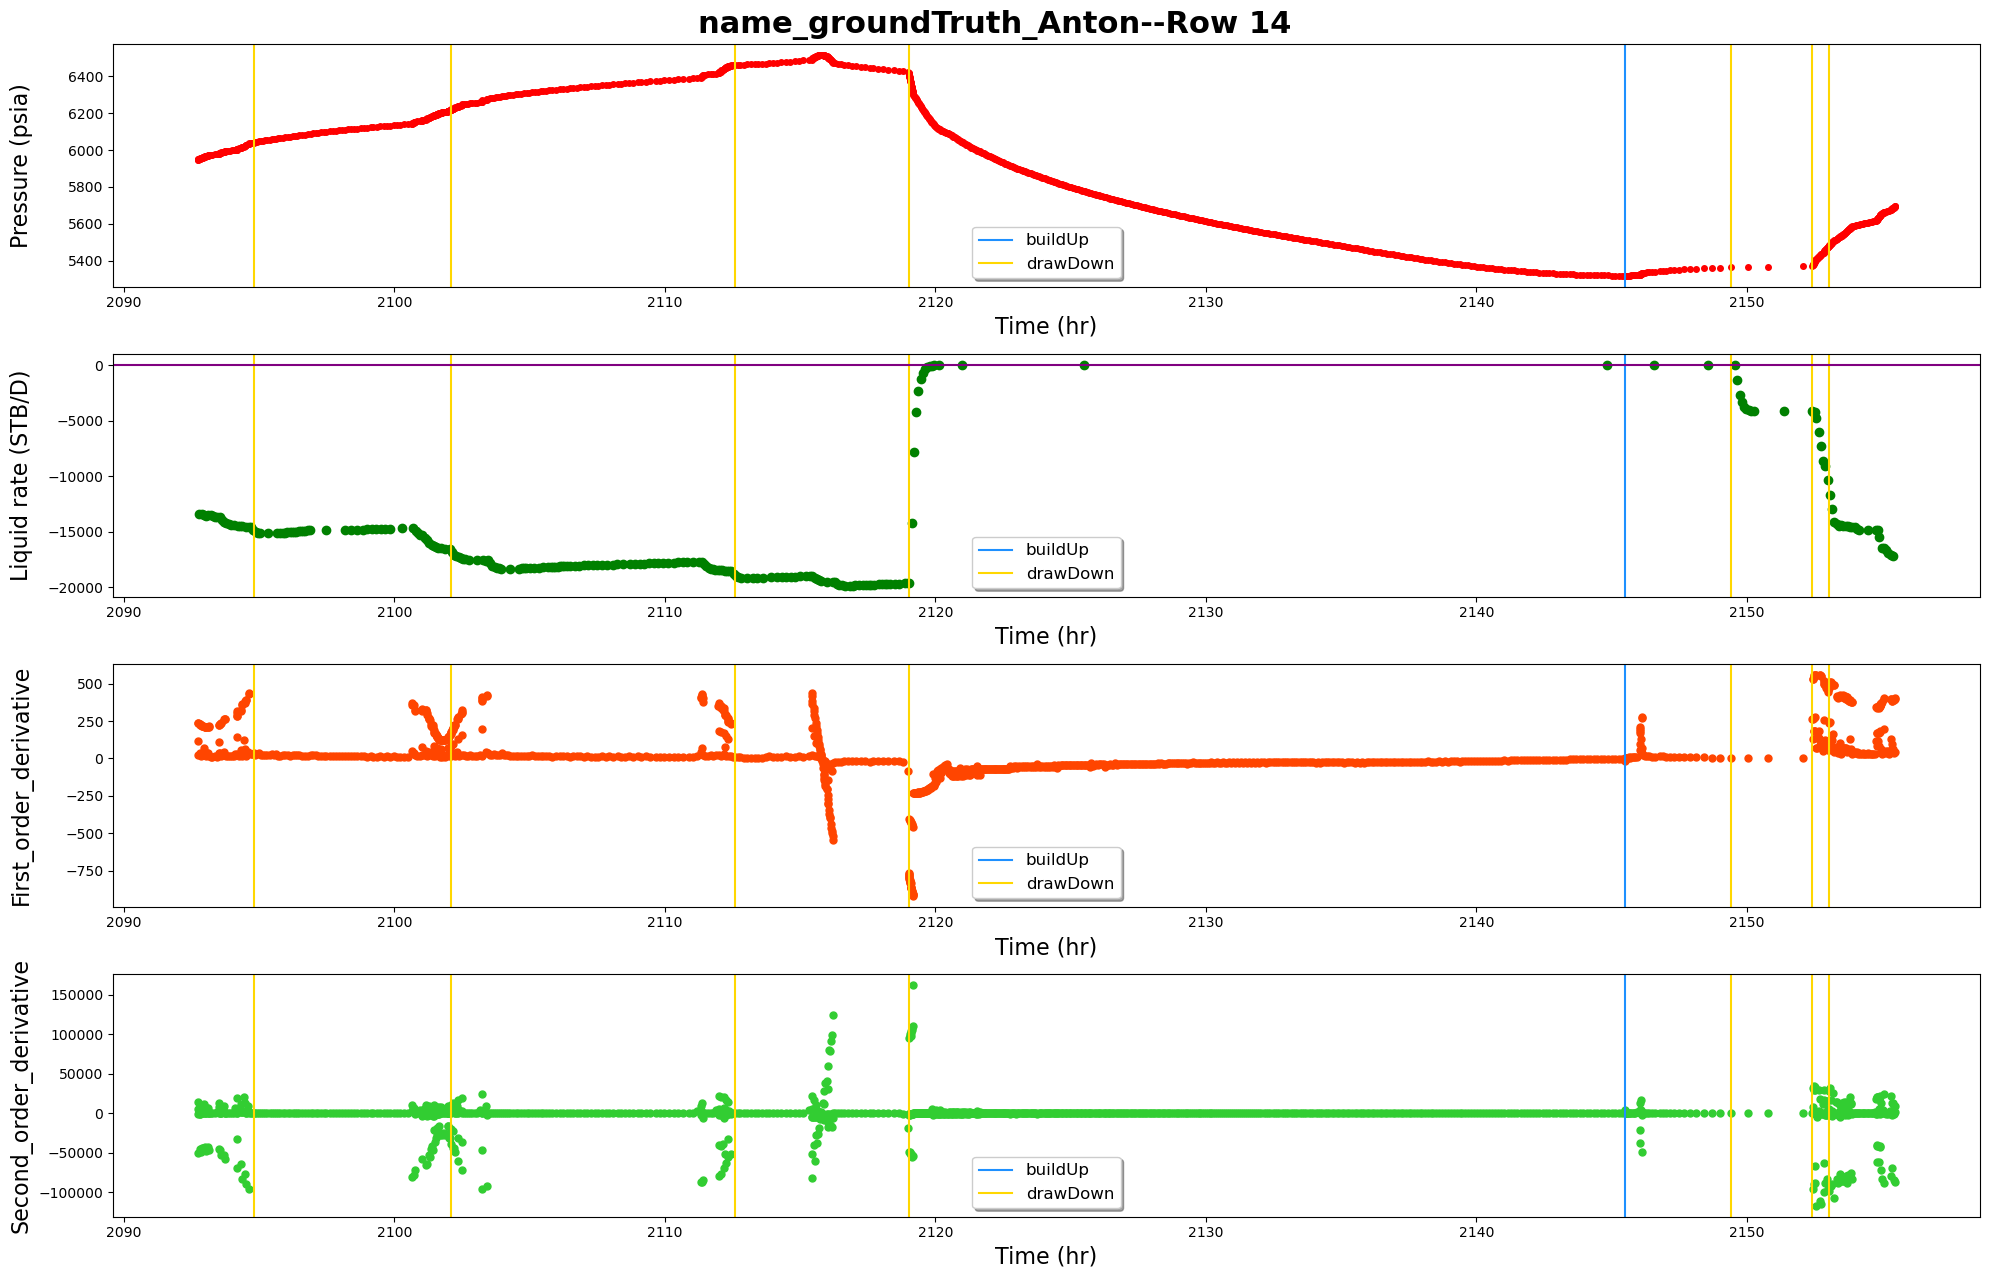

------row 15-----detected points:[16807, 17163, 17590]


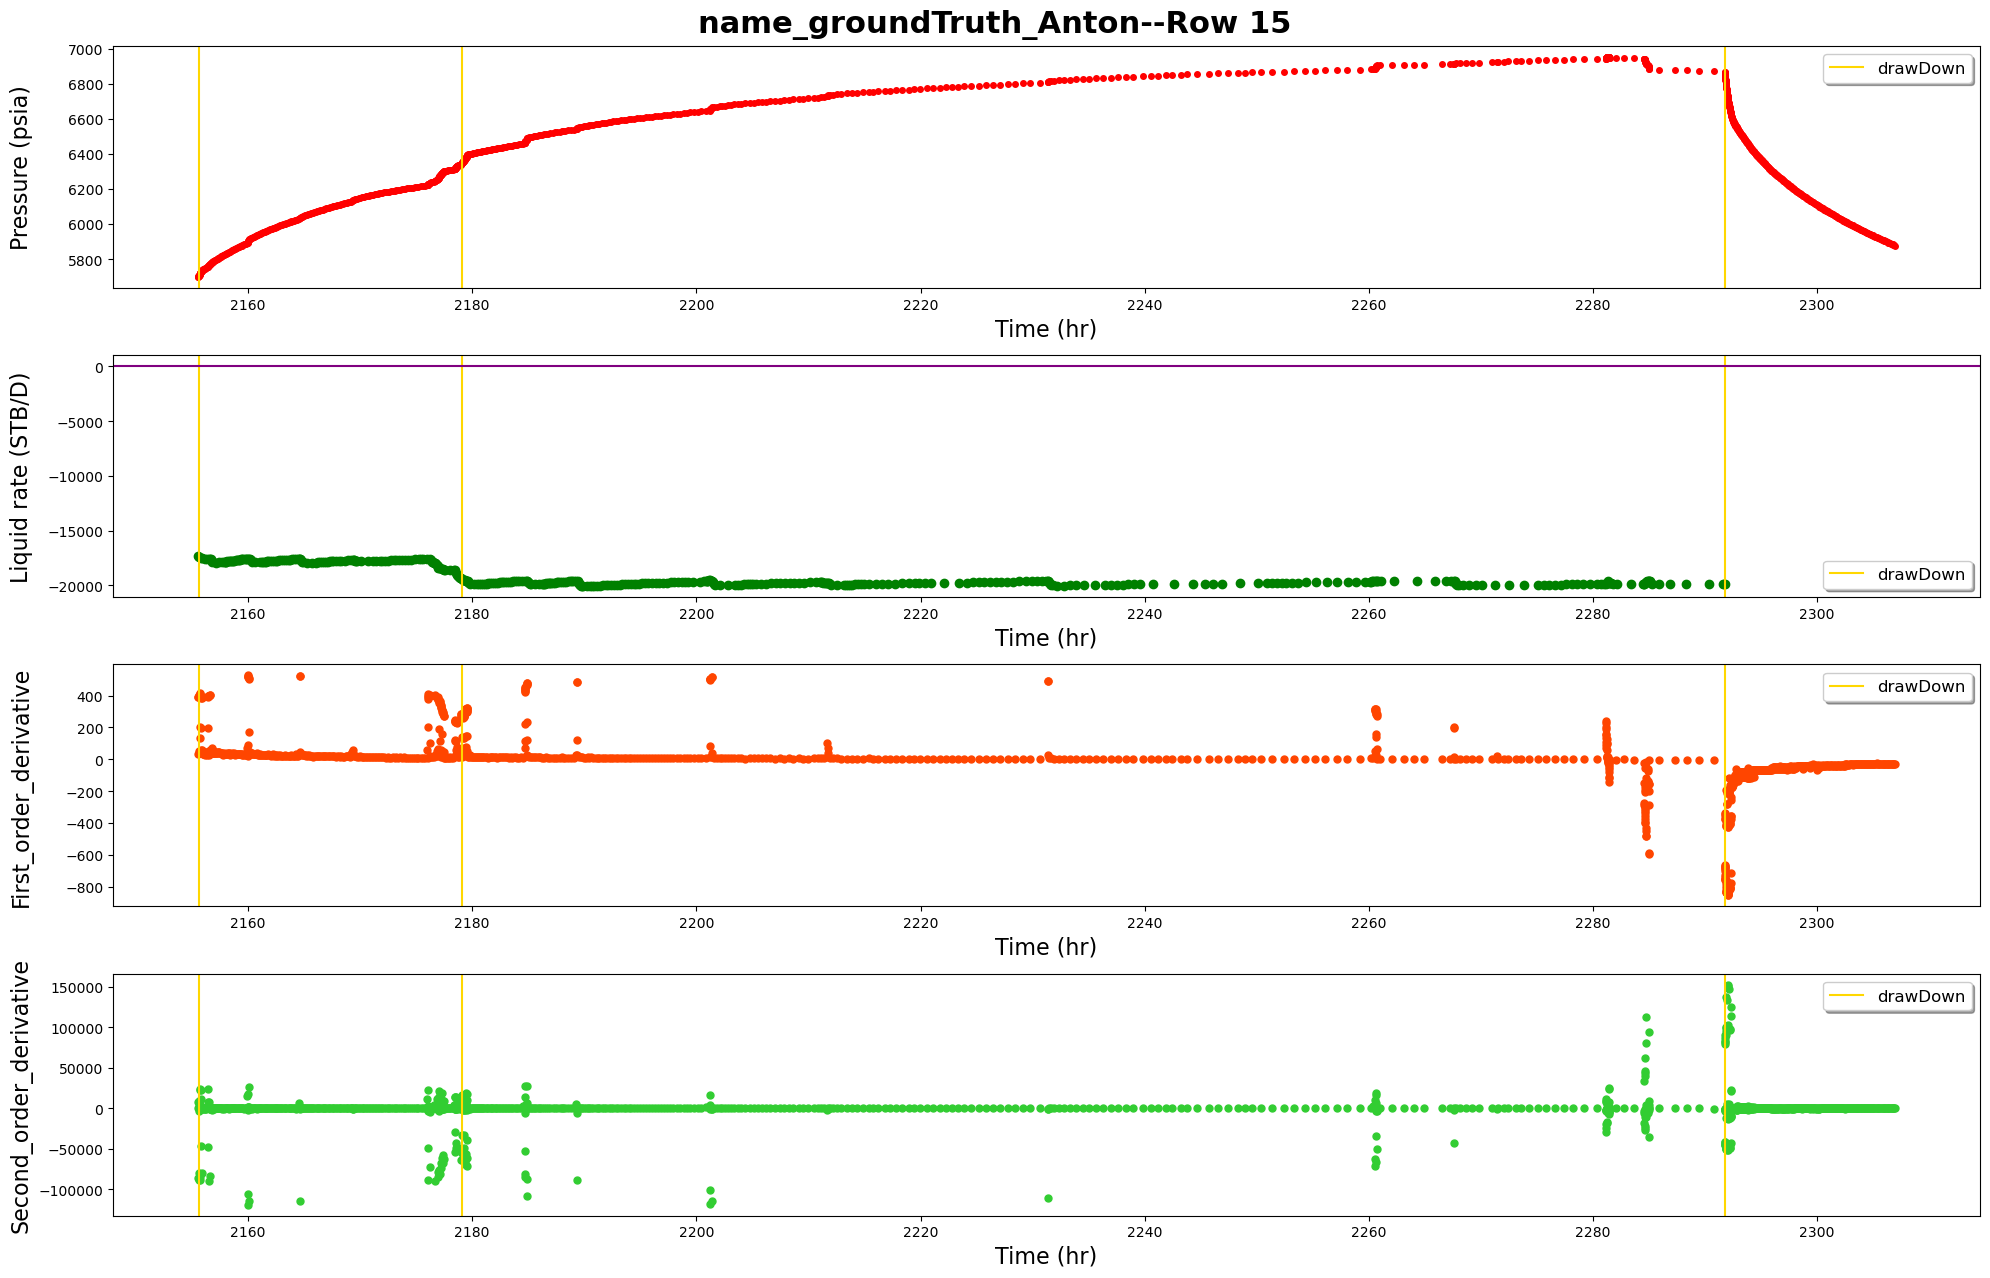

------row 16-----detected points:[18441, 18514, 18969]


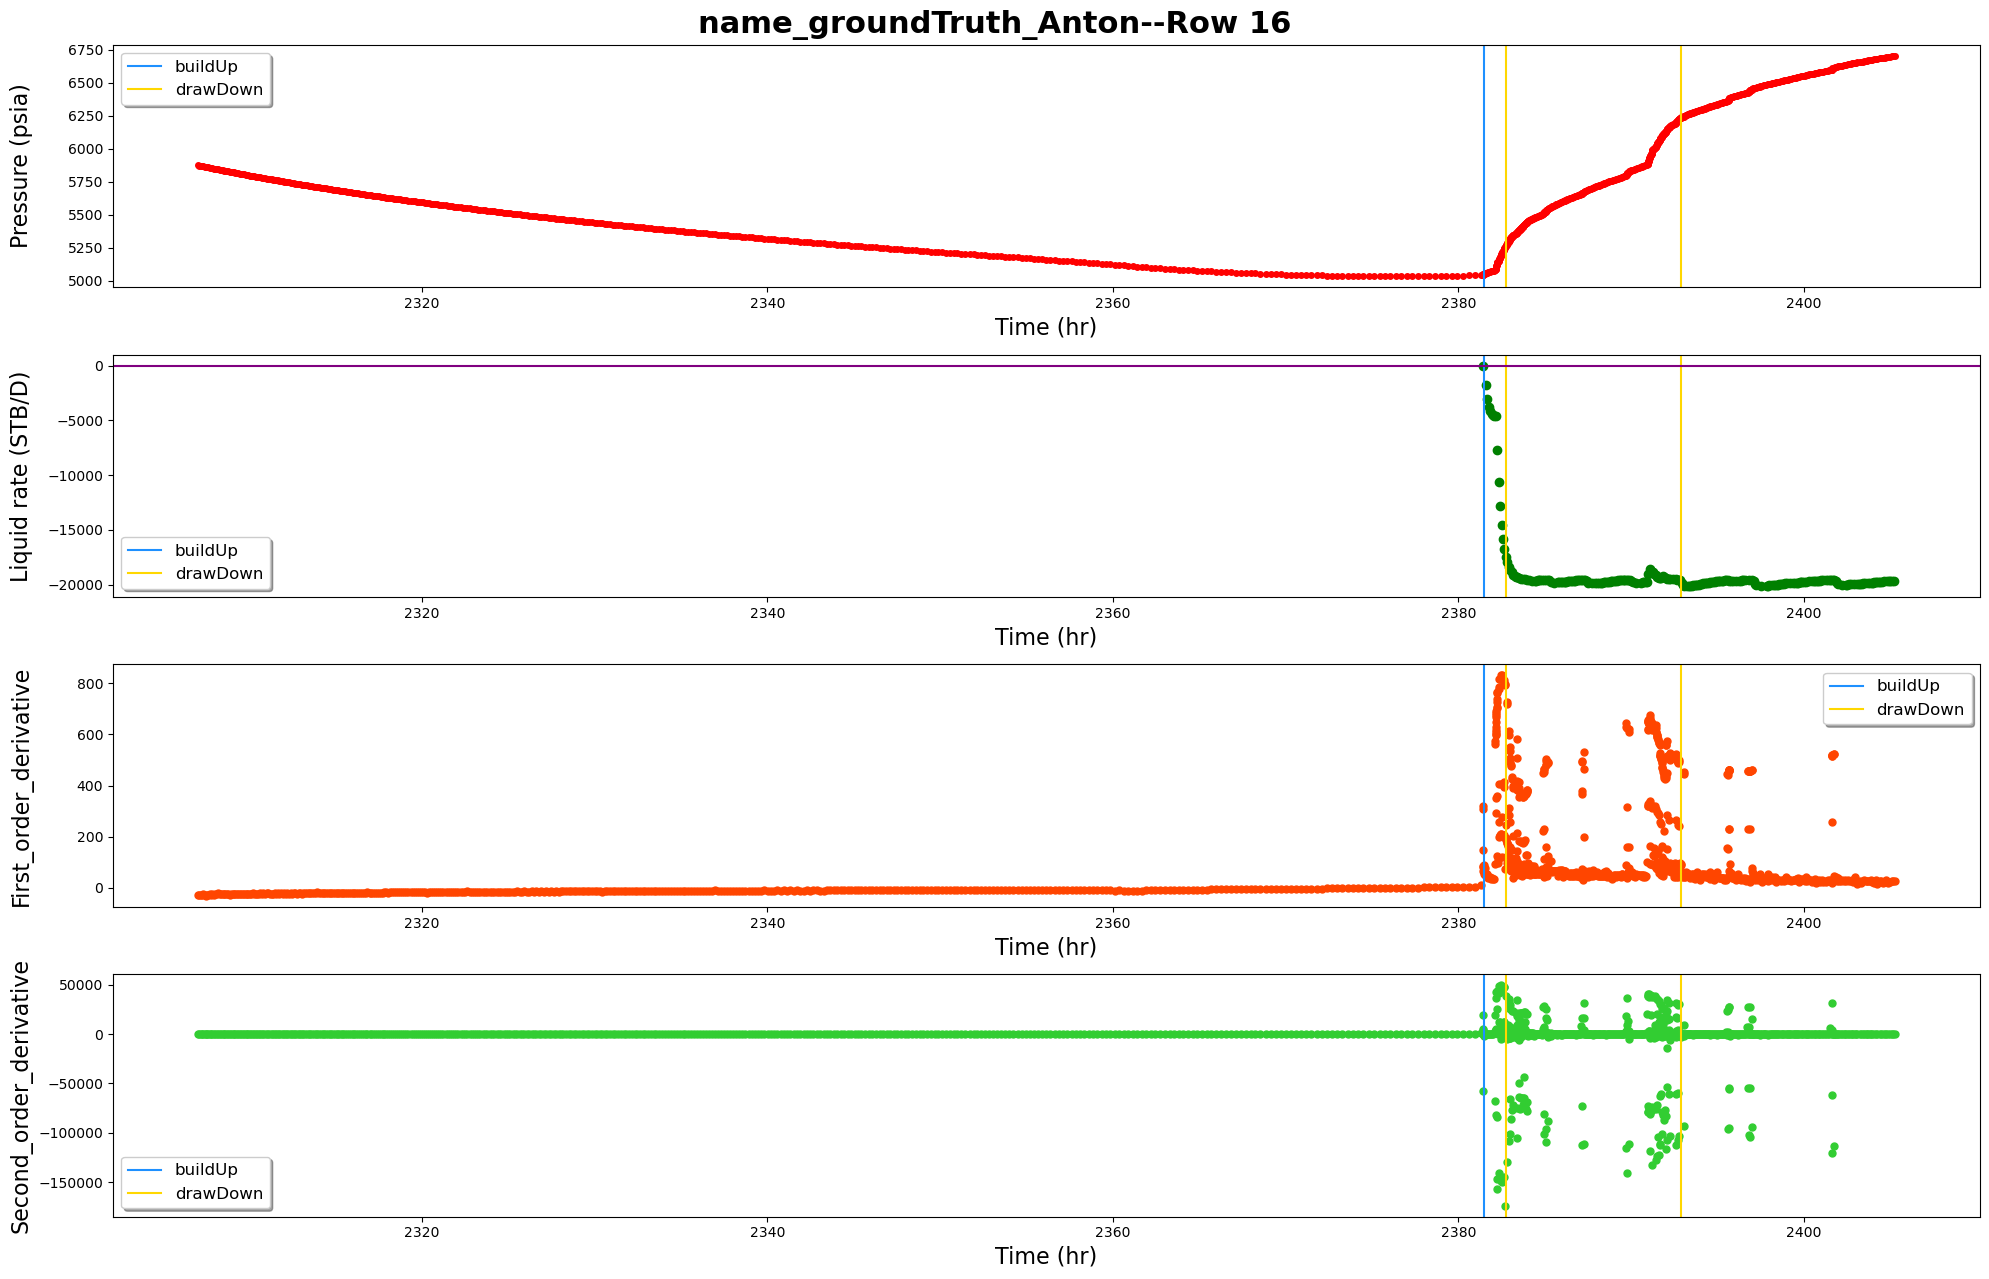

------row 17-----detected points:[19320, 19592, 19654, 19801, 19944, 20030, 20353]


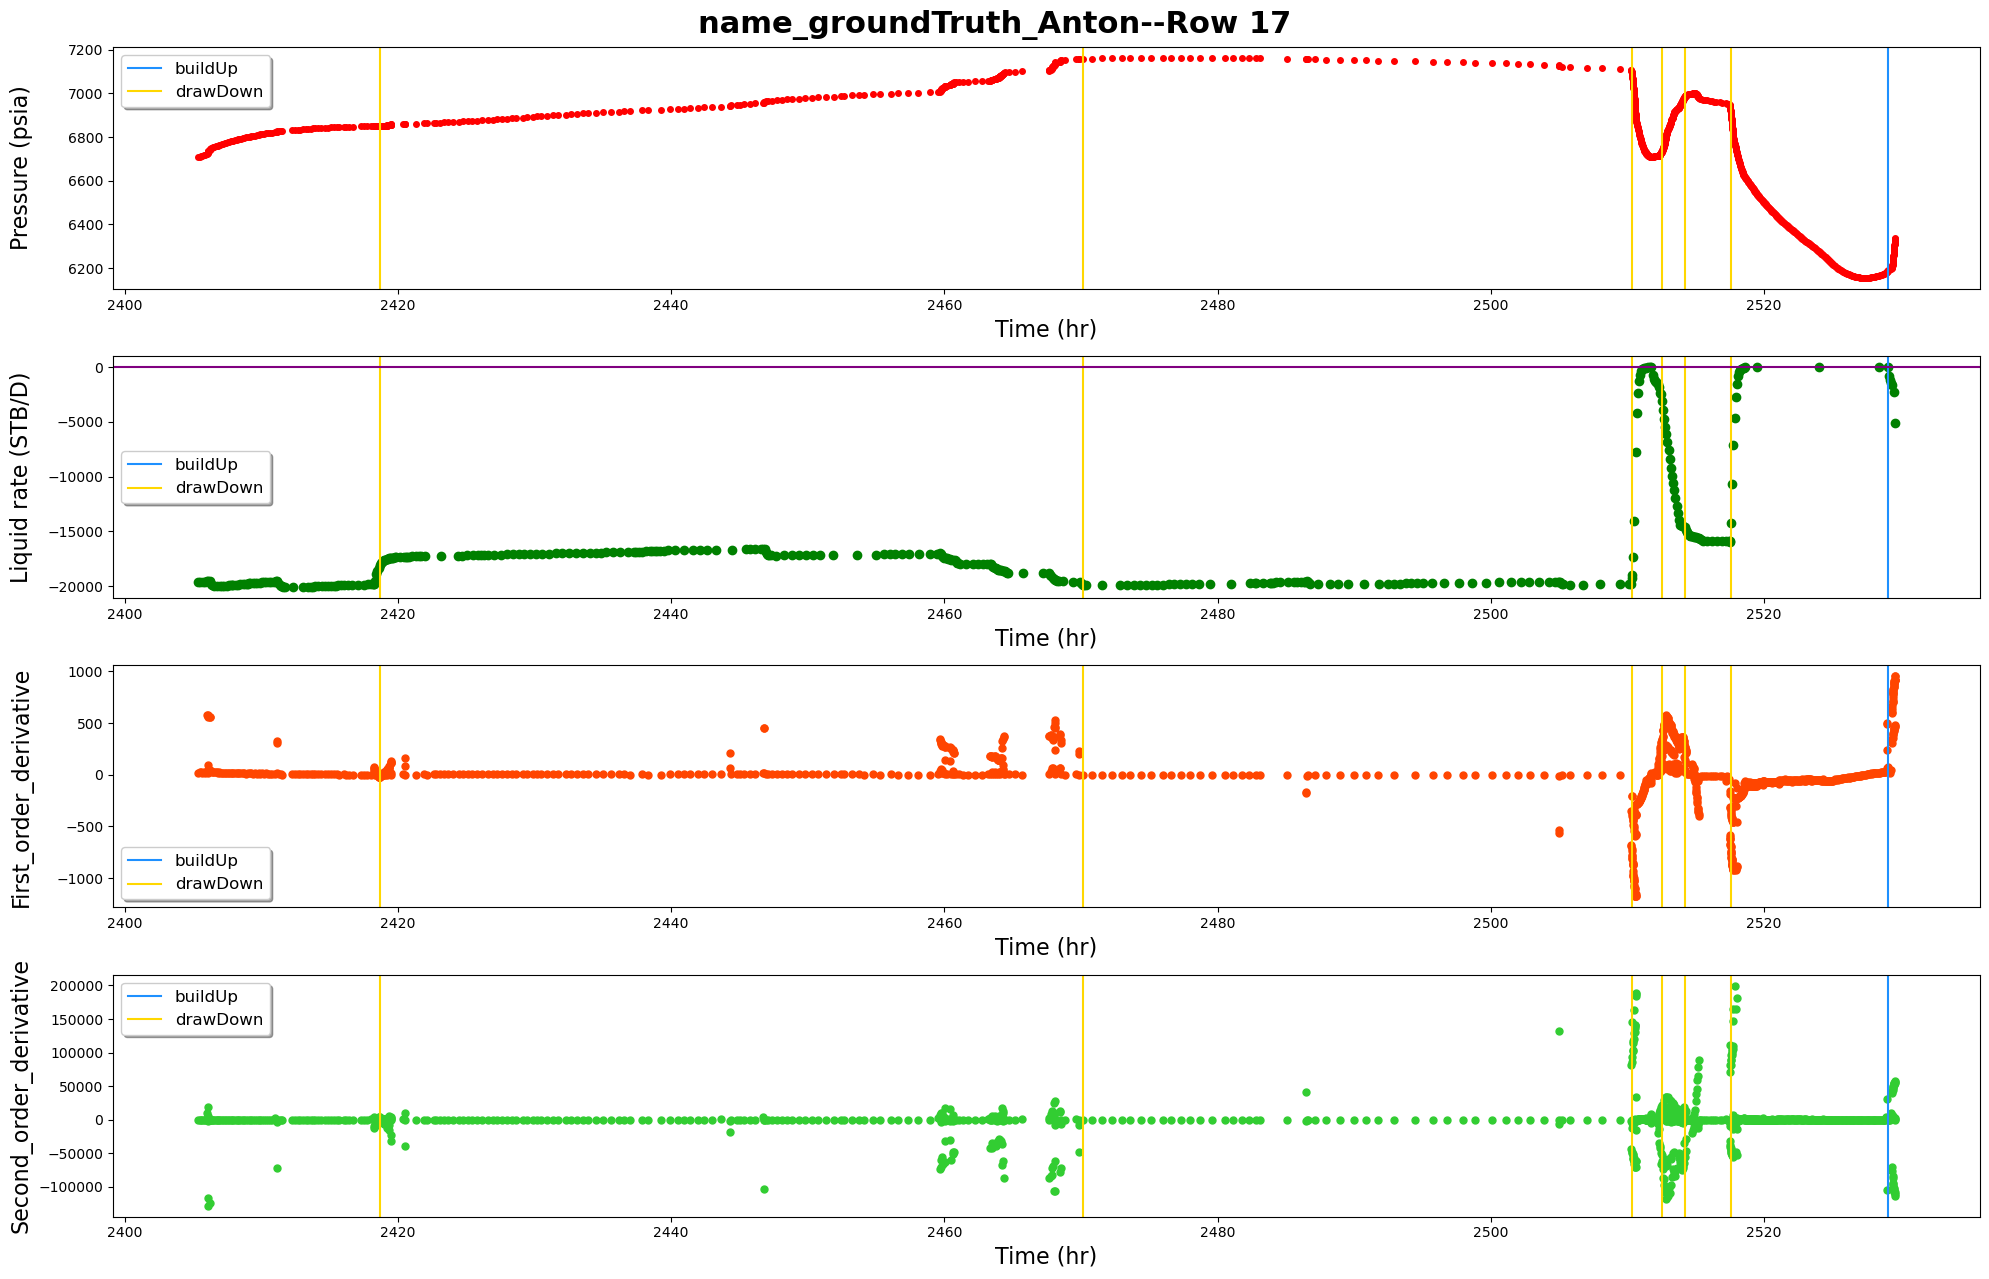

------row 18-----detected points:[20441, 20567, 20709, 21030, 21193, 21510, 21598]


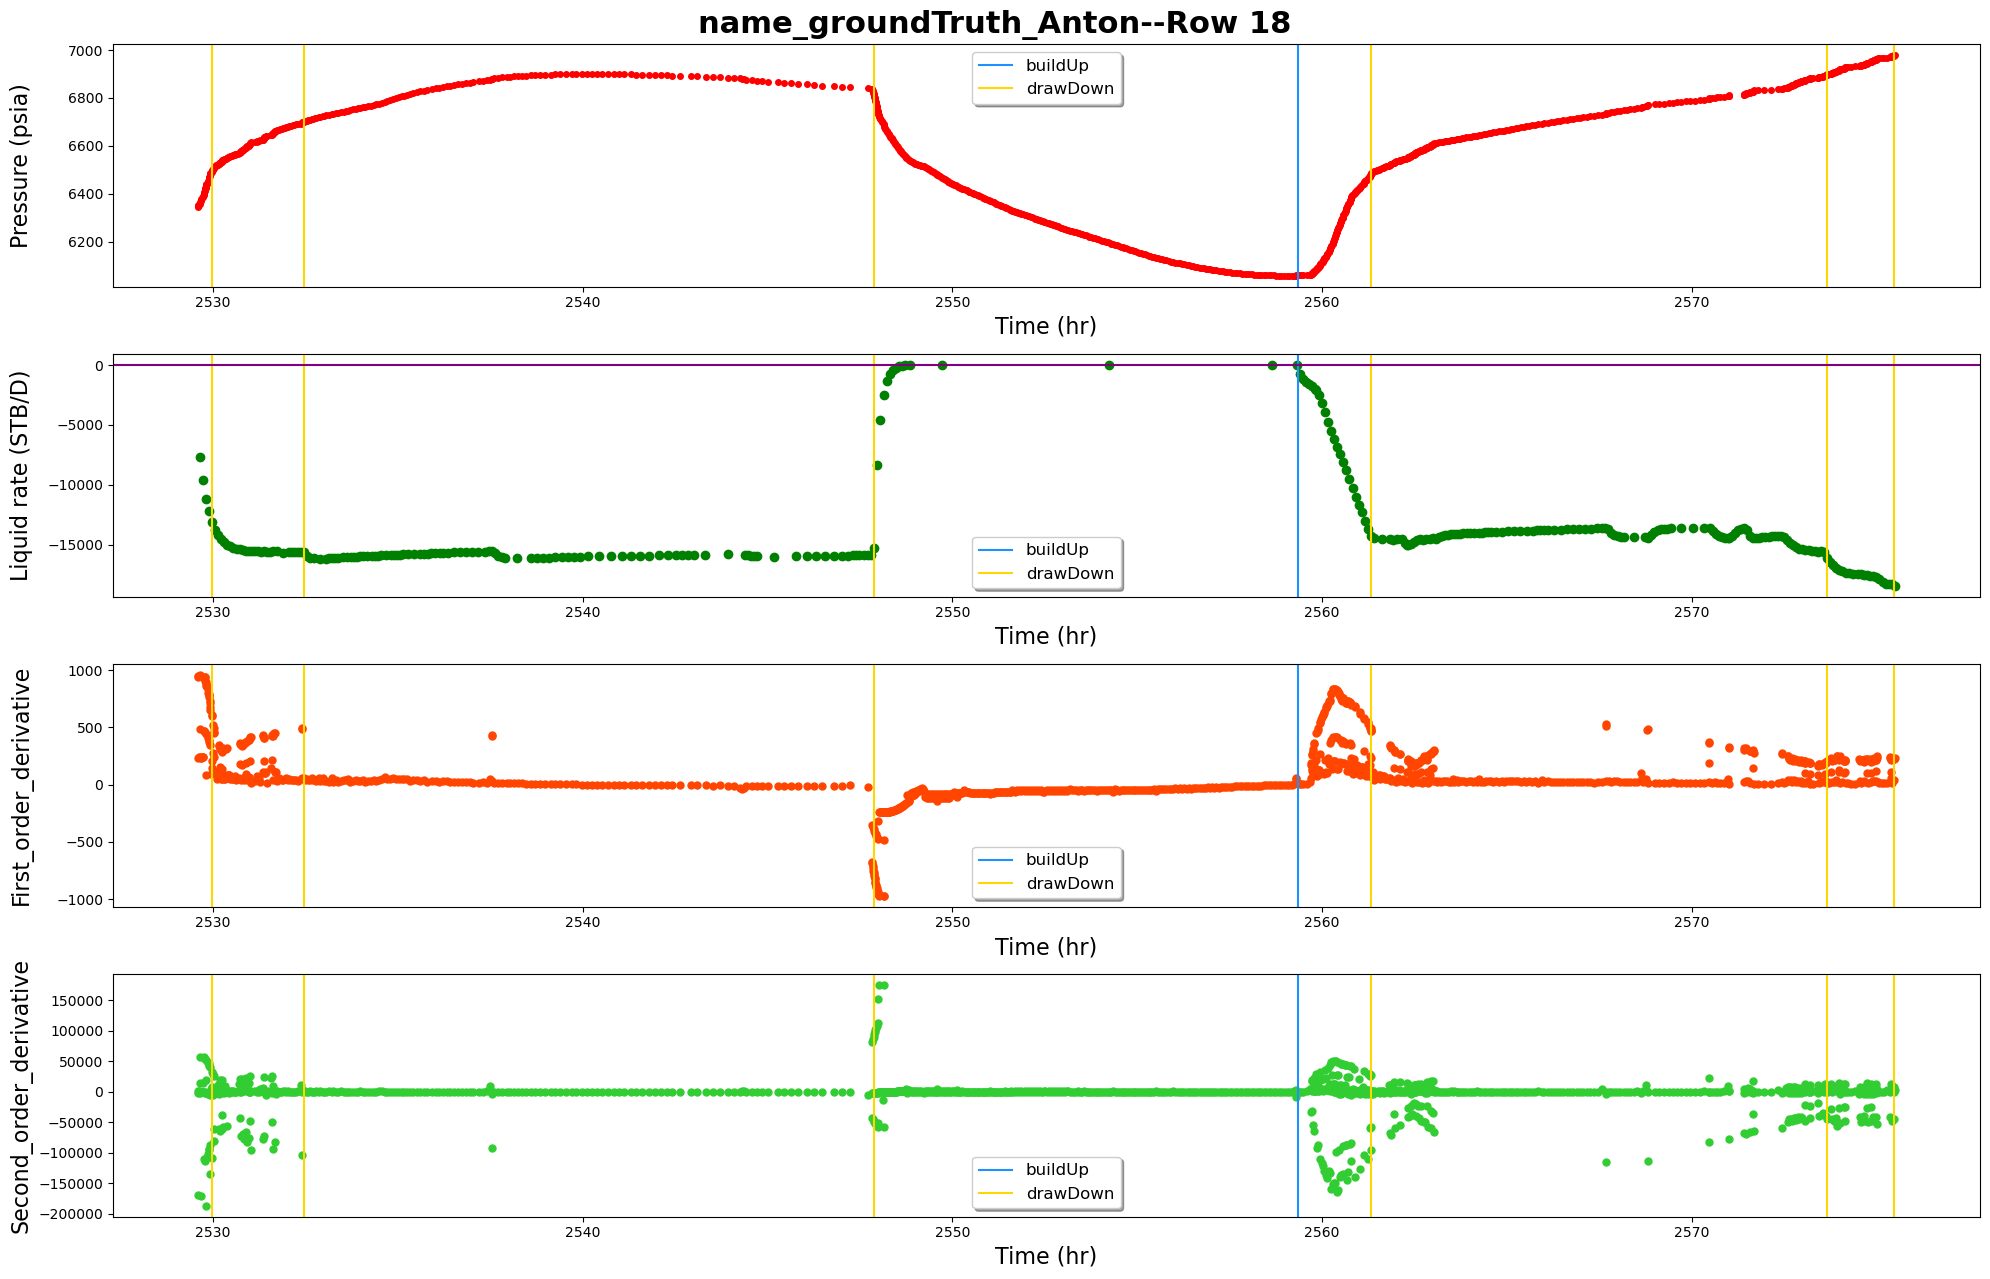

------row 19-----detected points:[21984, 22187, 22347, 22407, 22538, 22713]


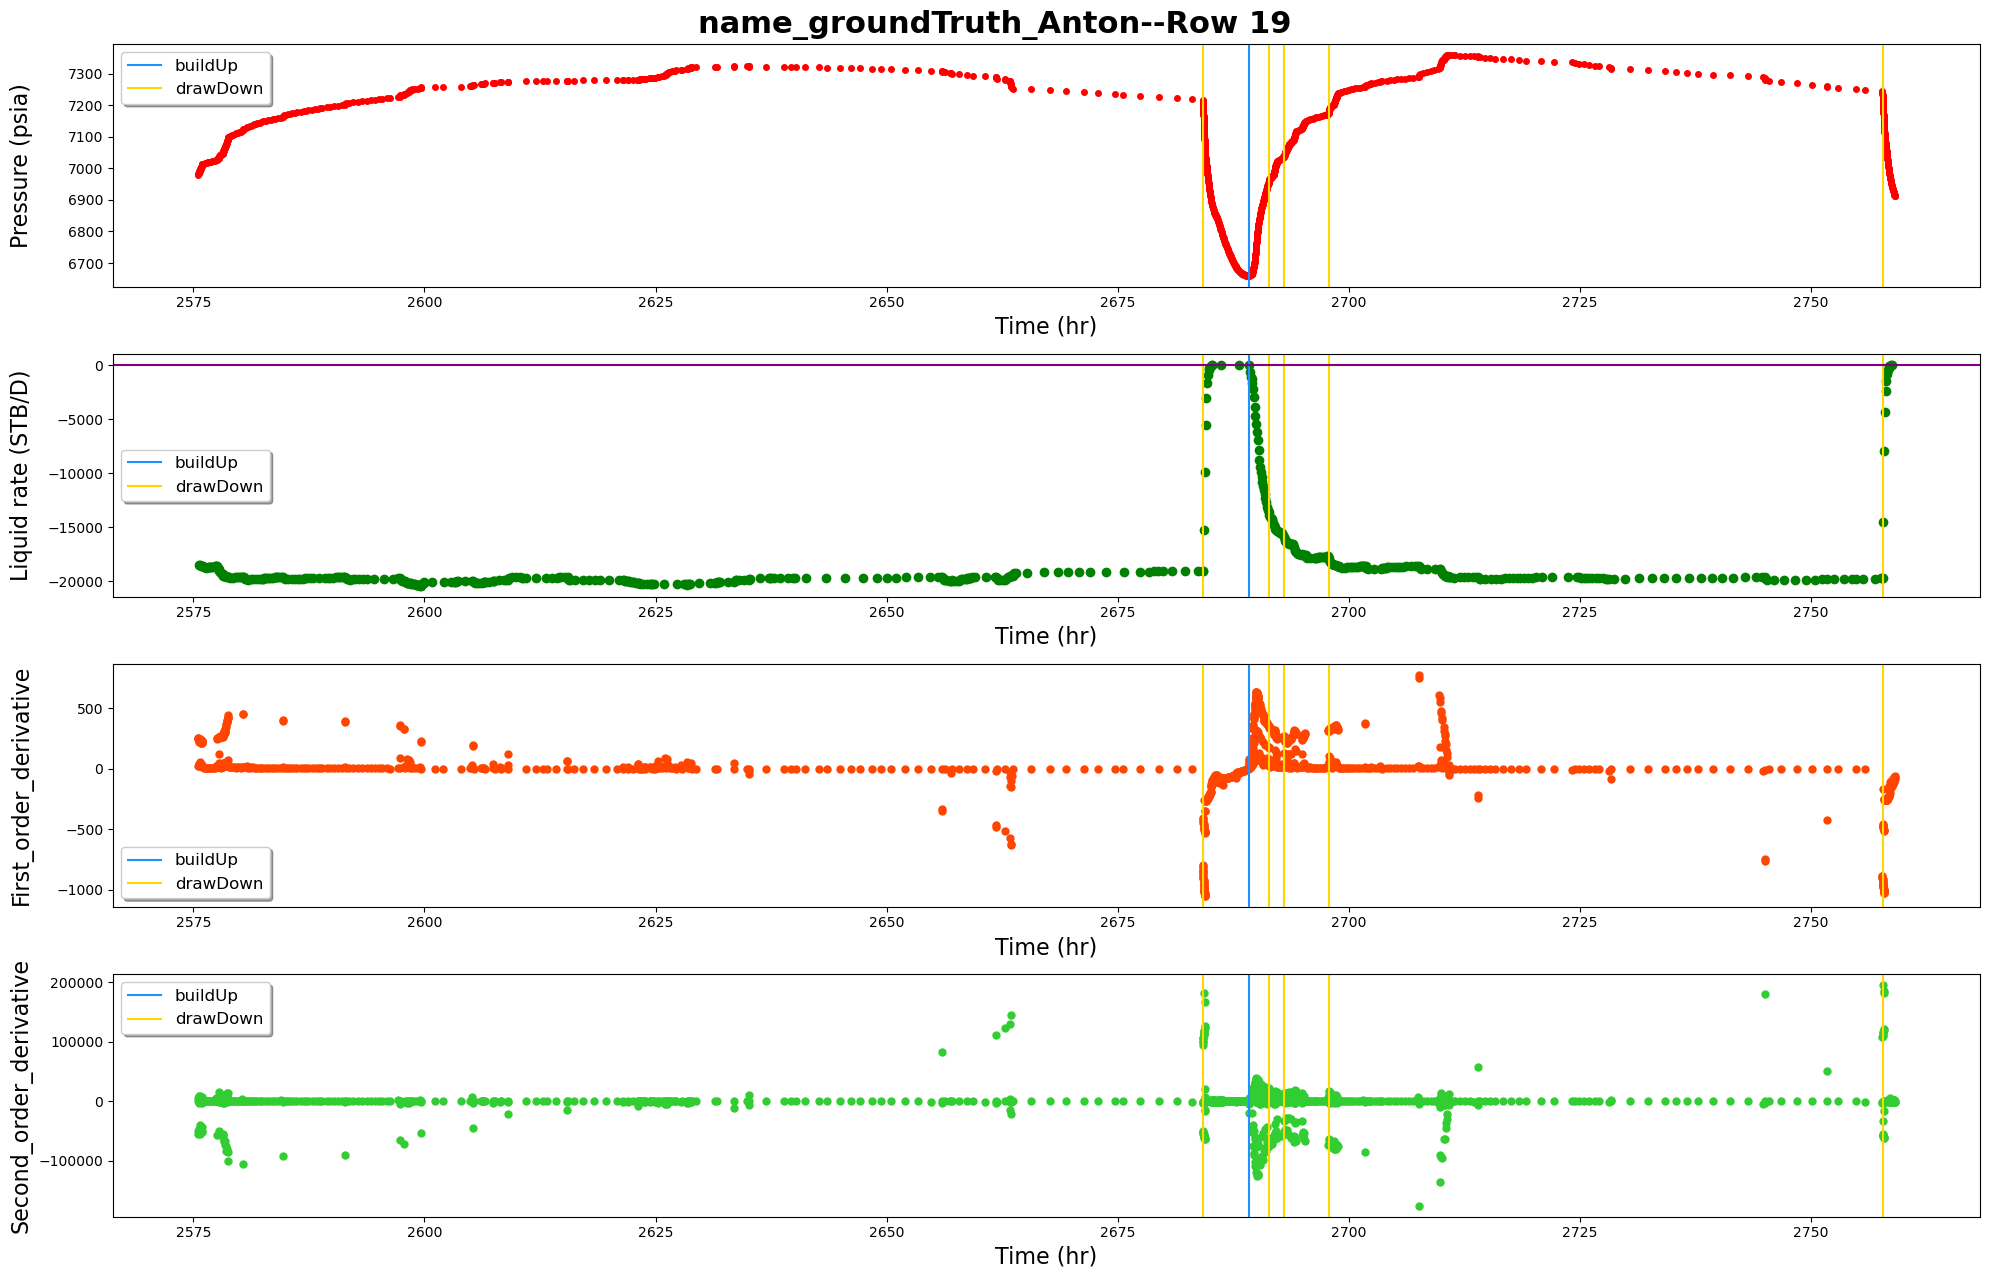

------row 20-----detected points:[23219, 23411, 23480, 23781, 23932]


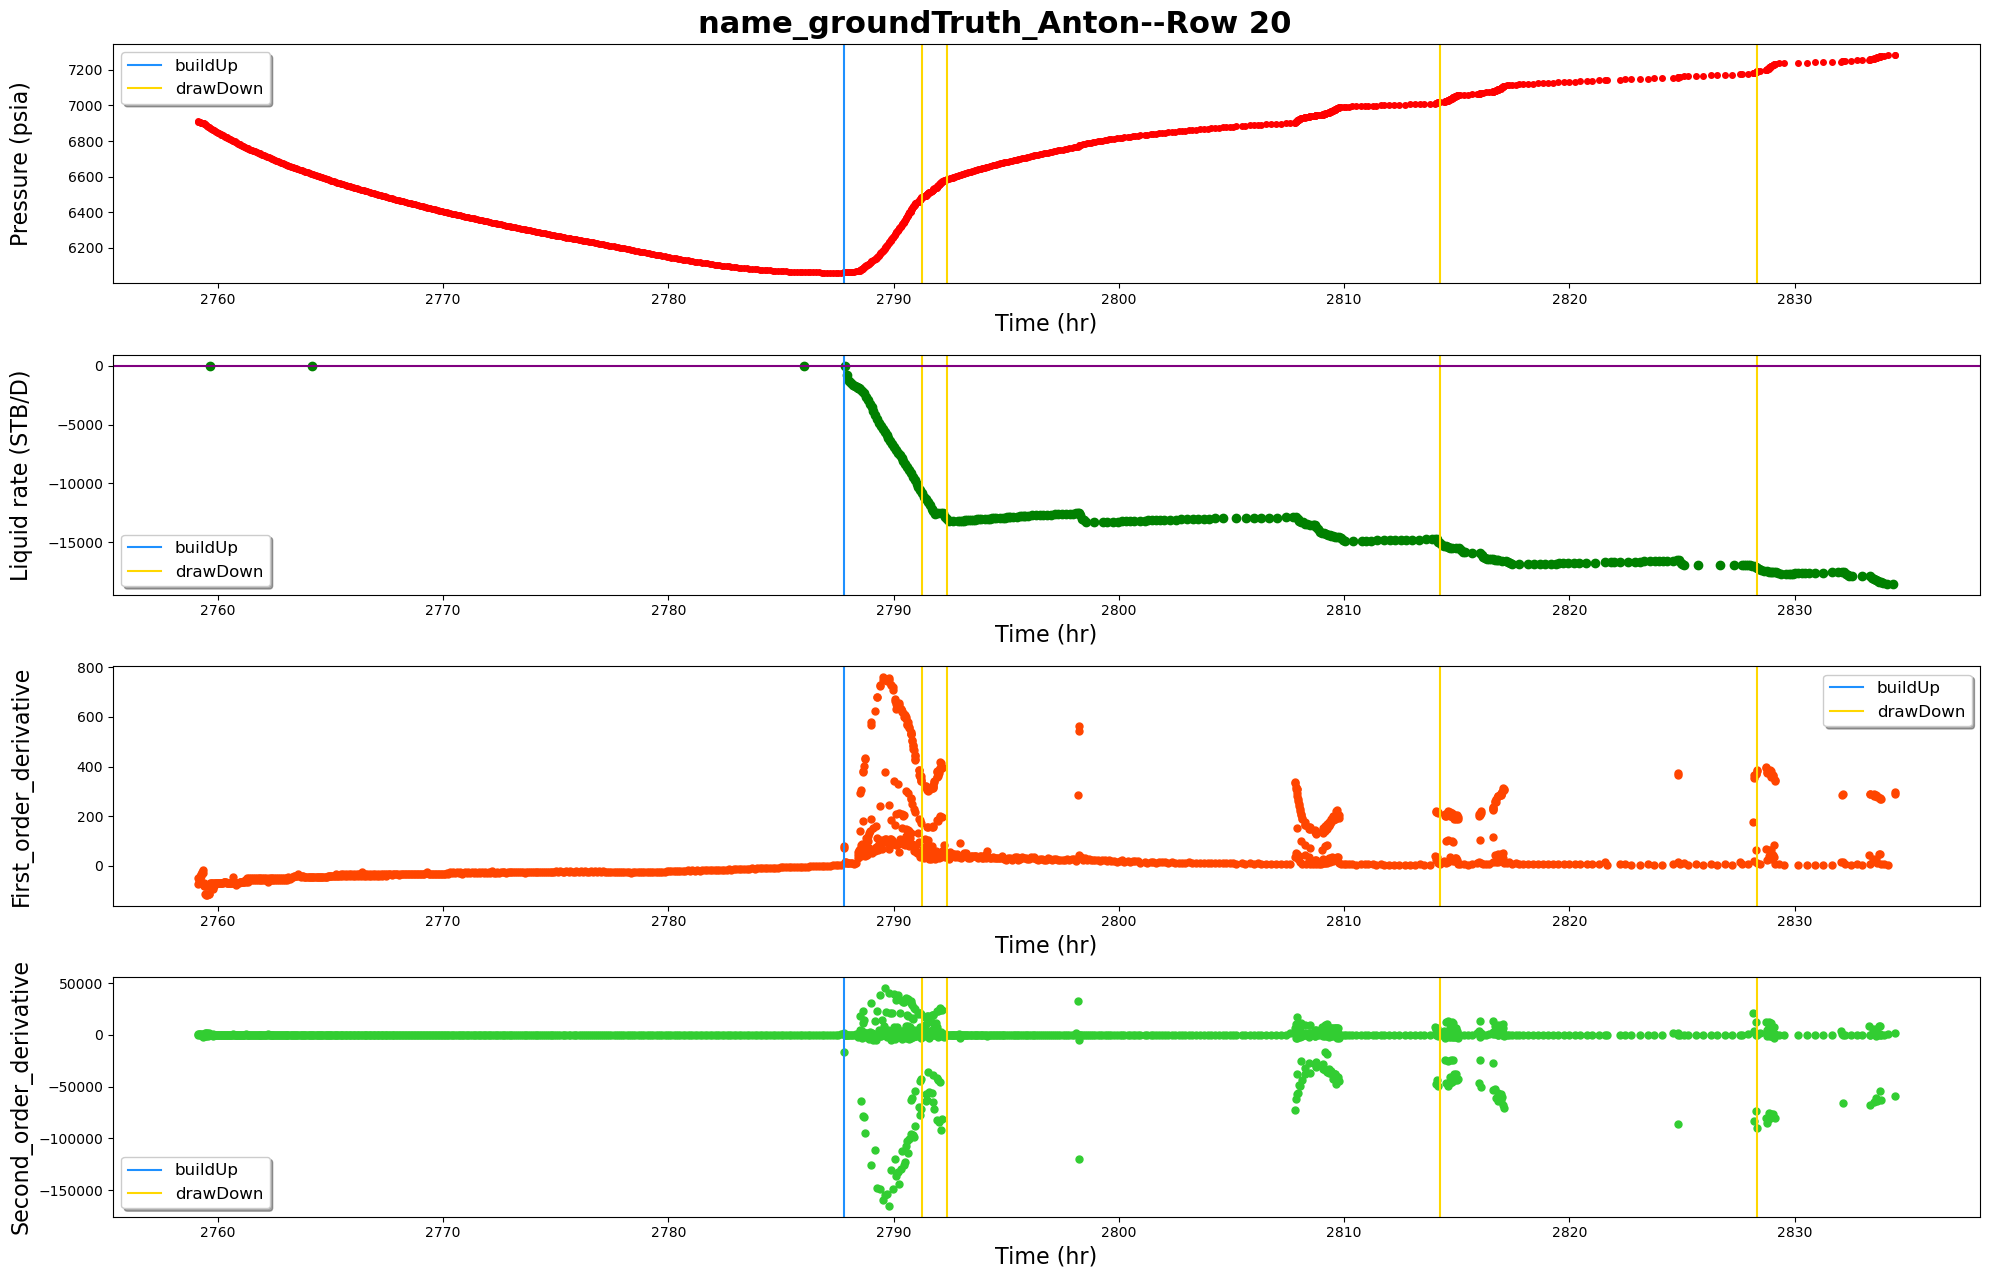

------row 21-----detected points:[24013, 24233, 24271, 24715, 24769, 25000, 25161]


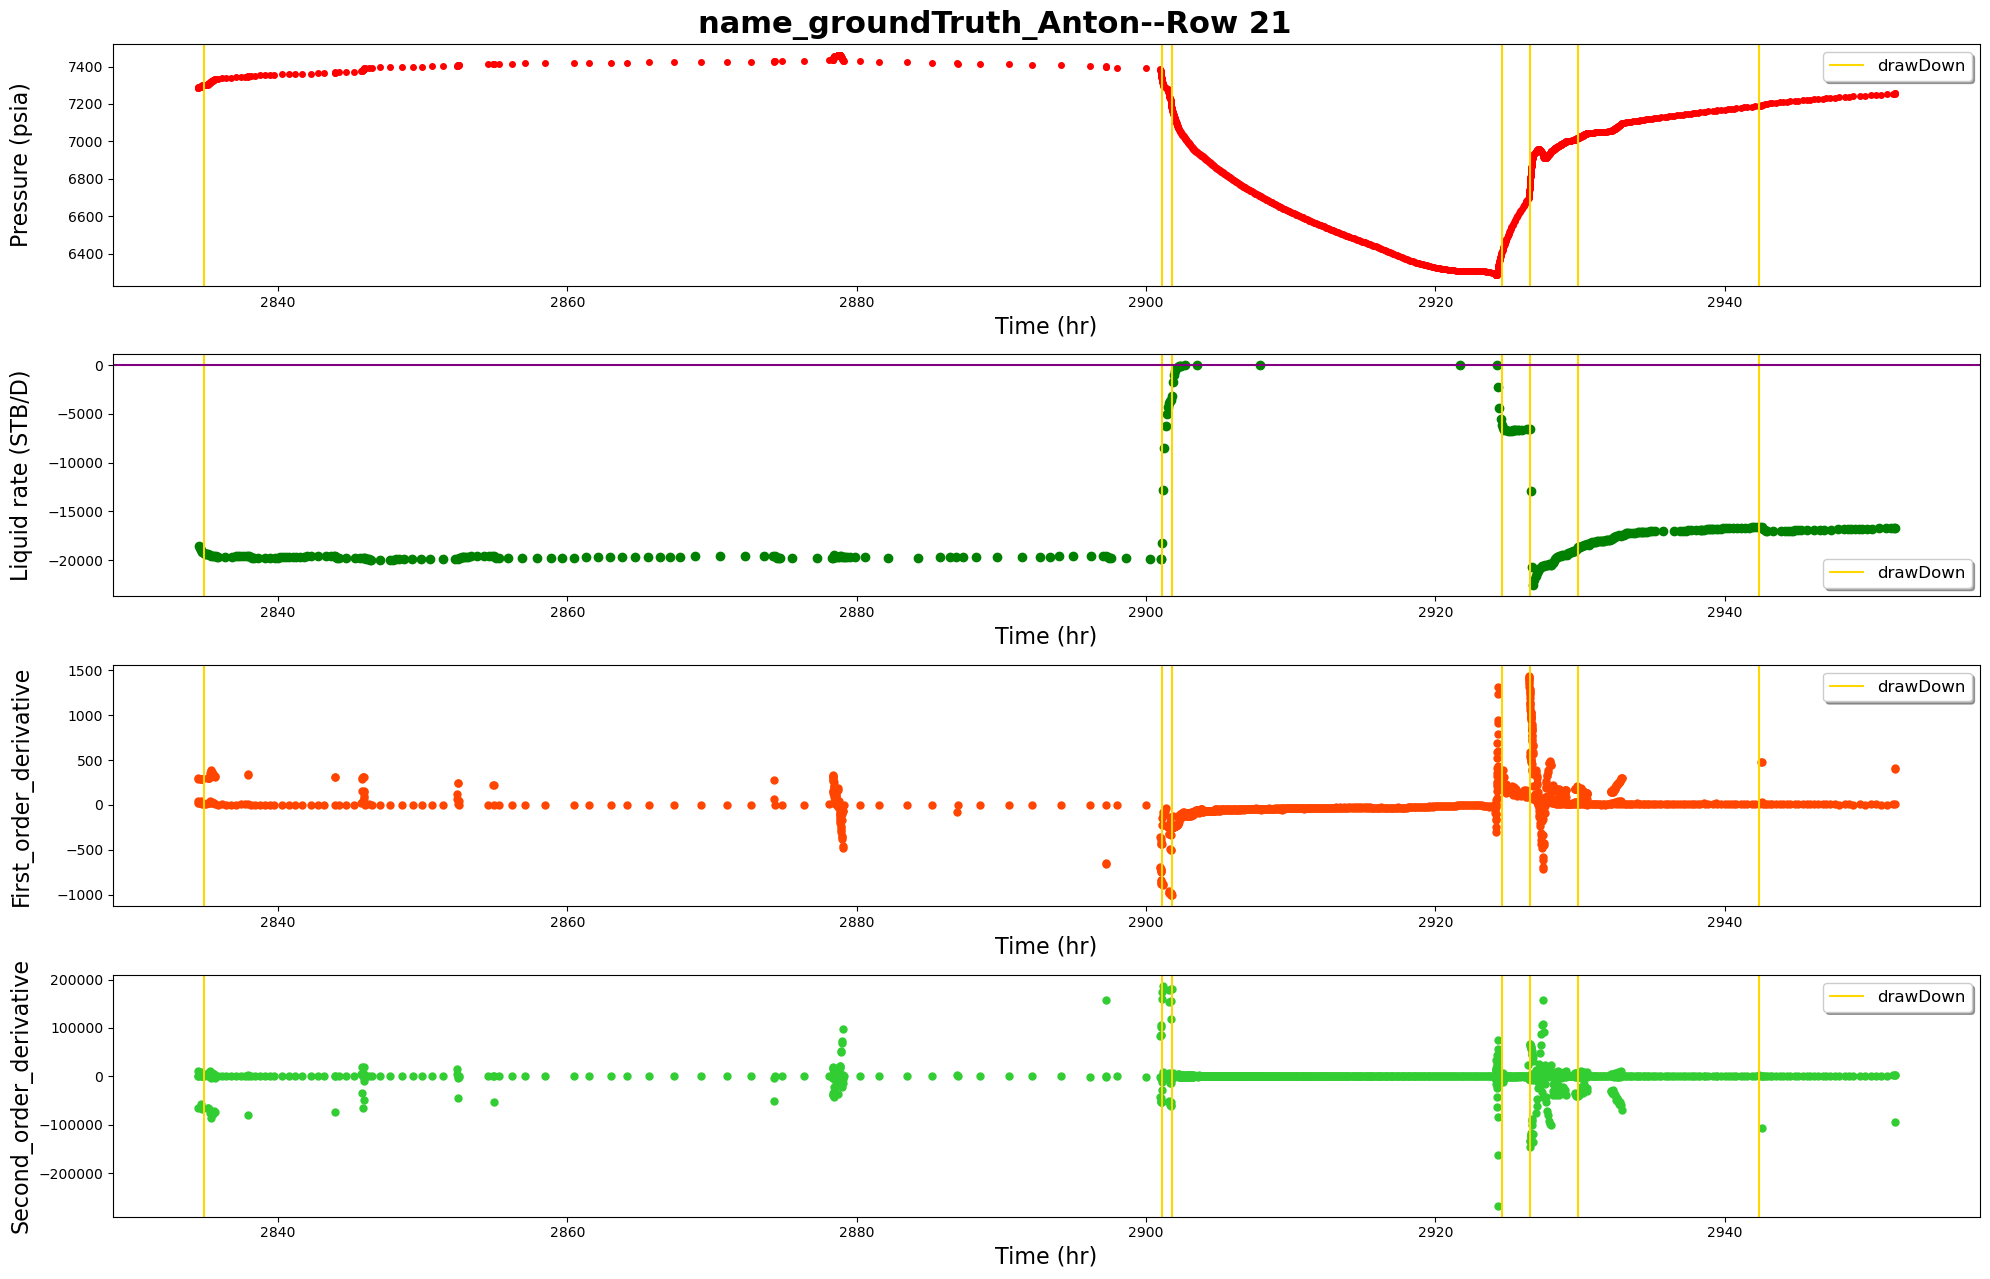

------row 22-----detected points:[25305, 25556, 25716, 26008, 26279, 26384]


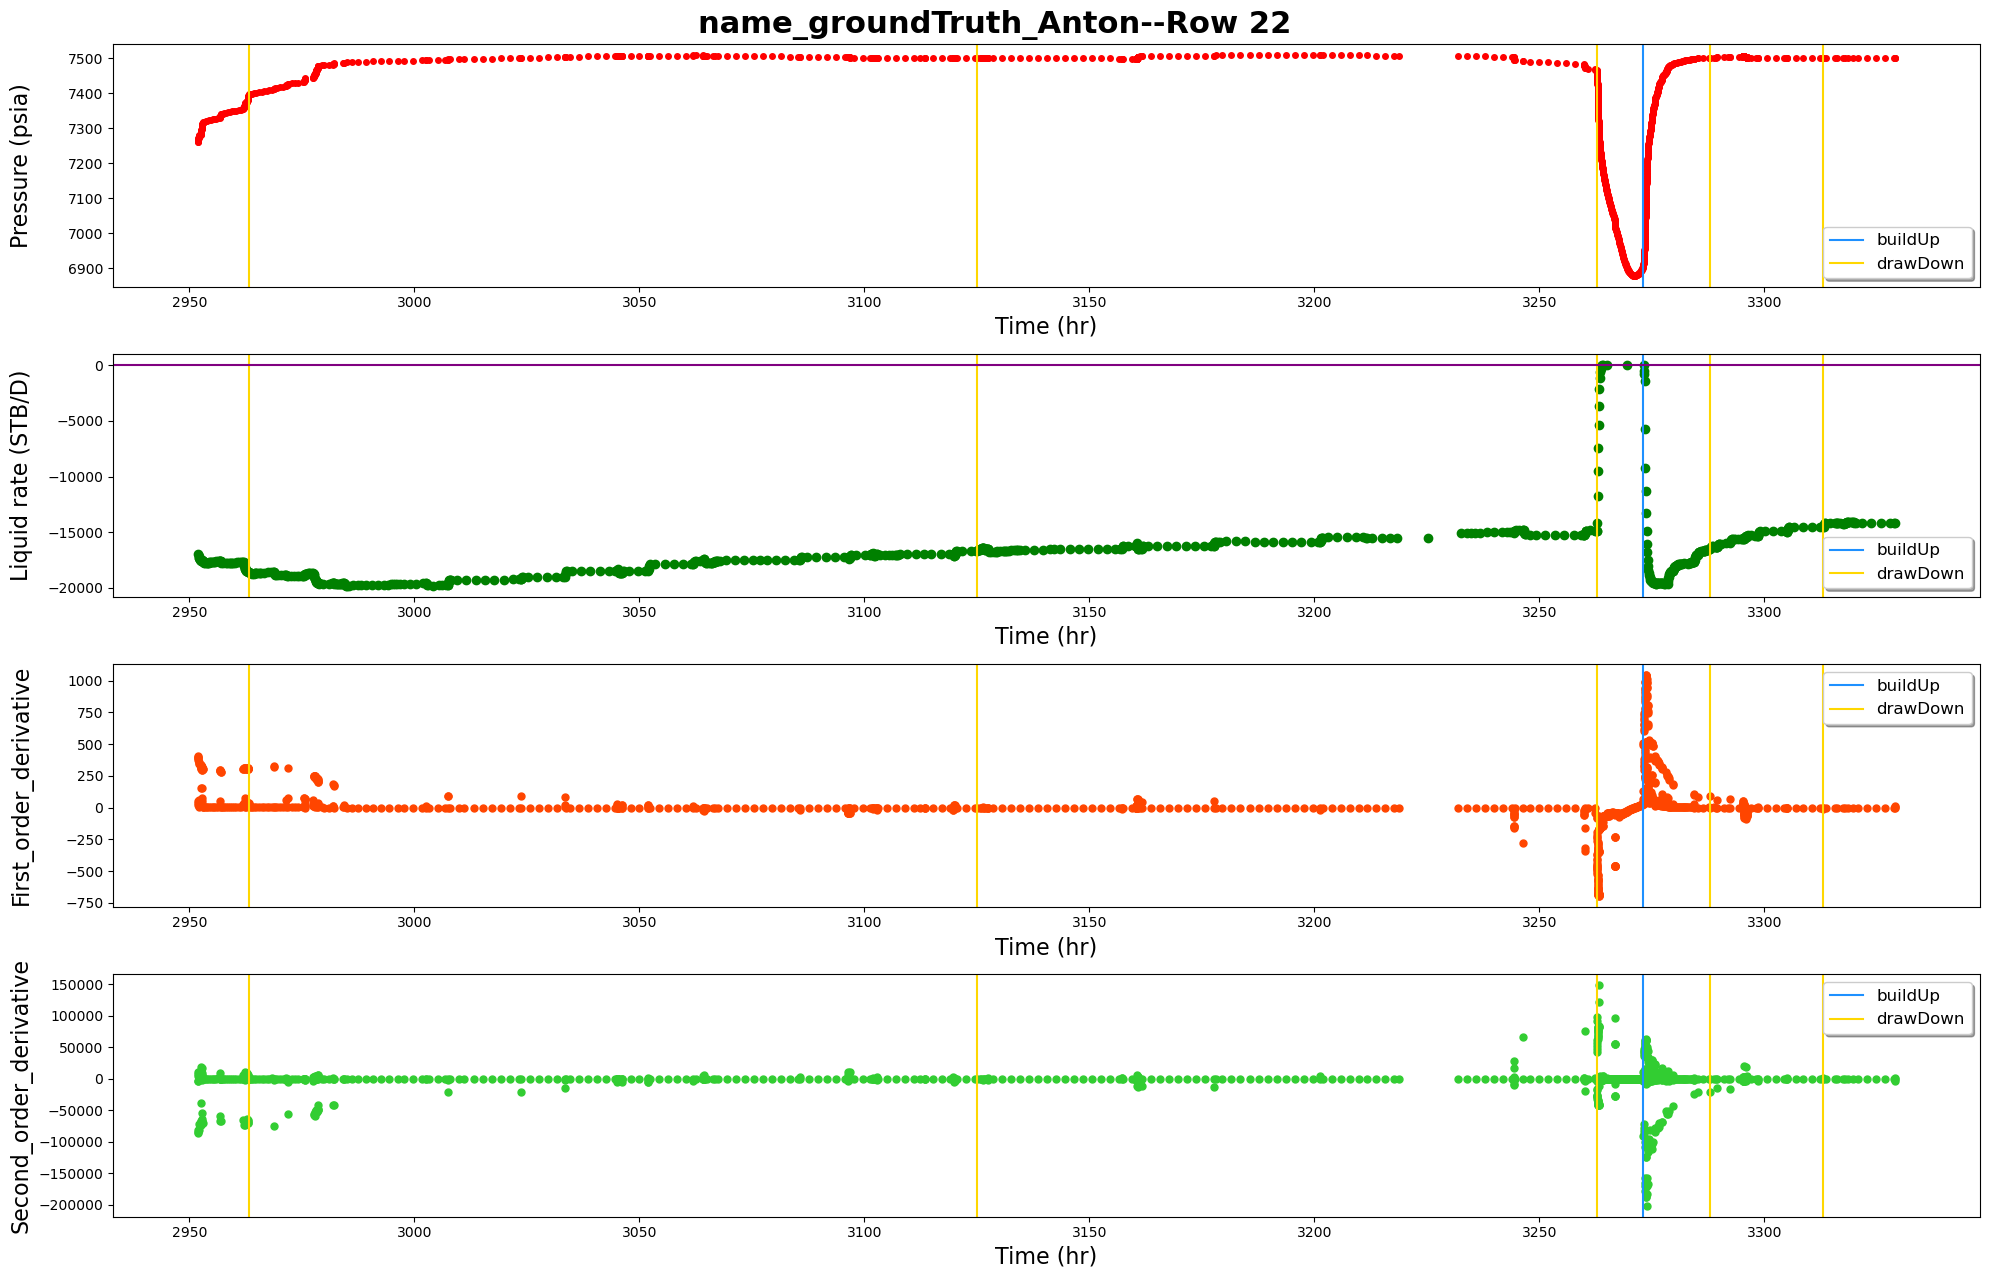

------row 23-----detected points:[26540, 26667, 26739, 26786, 26843, 27023, 27321, 27505]


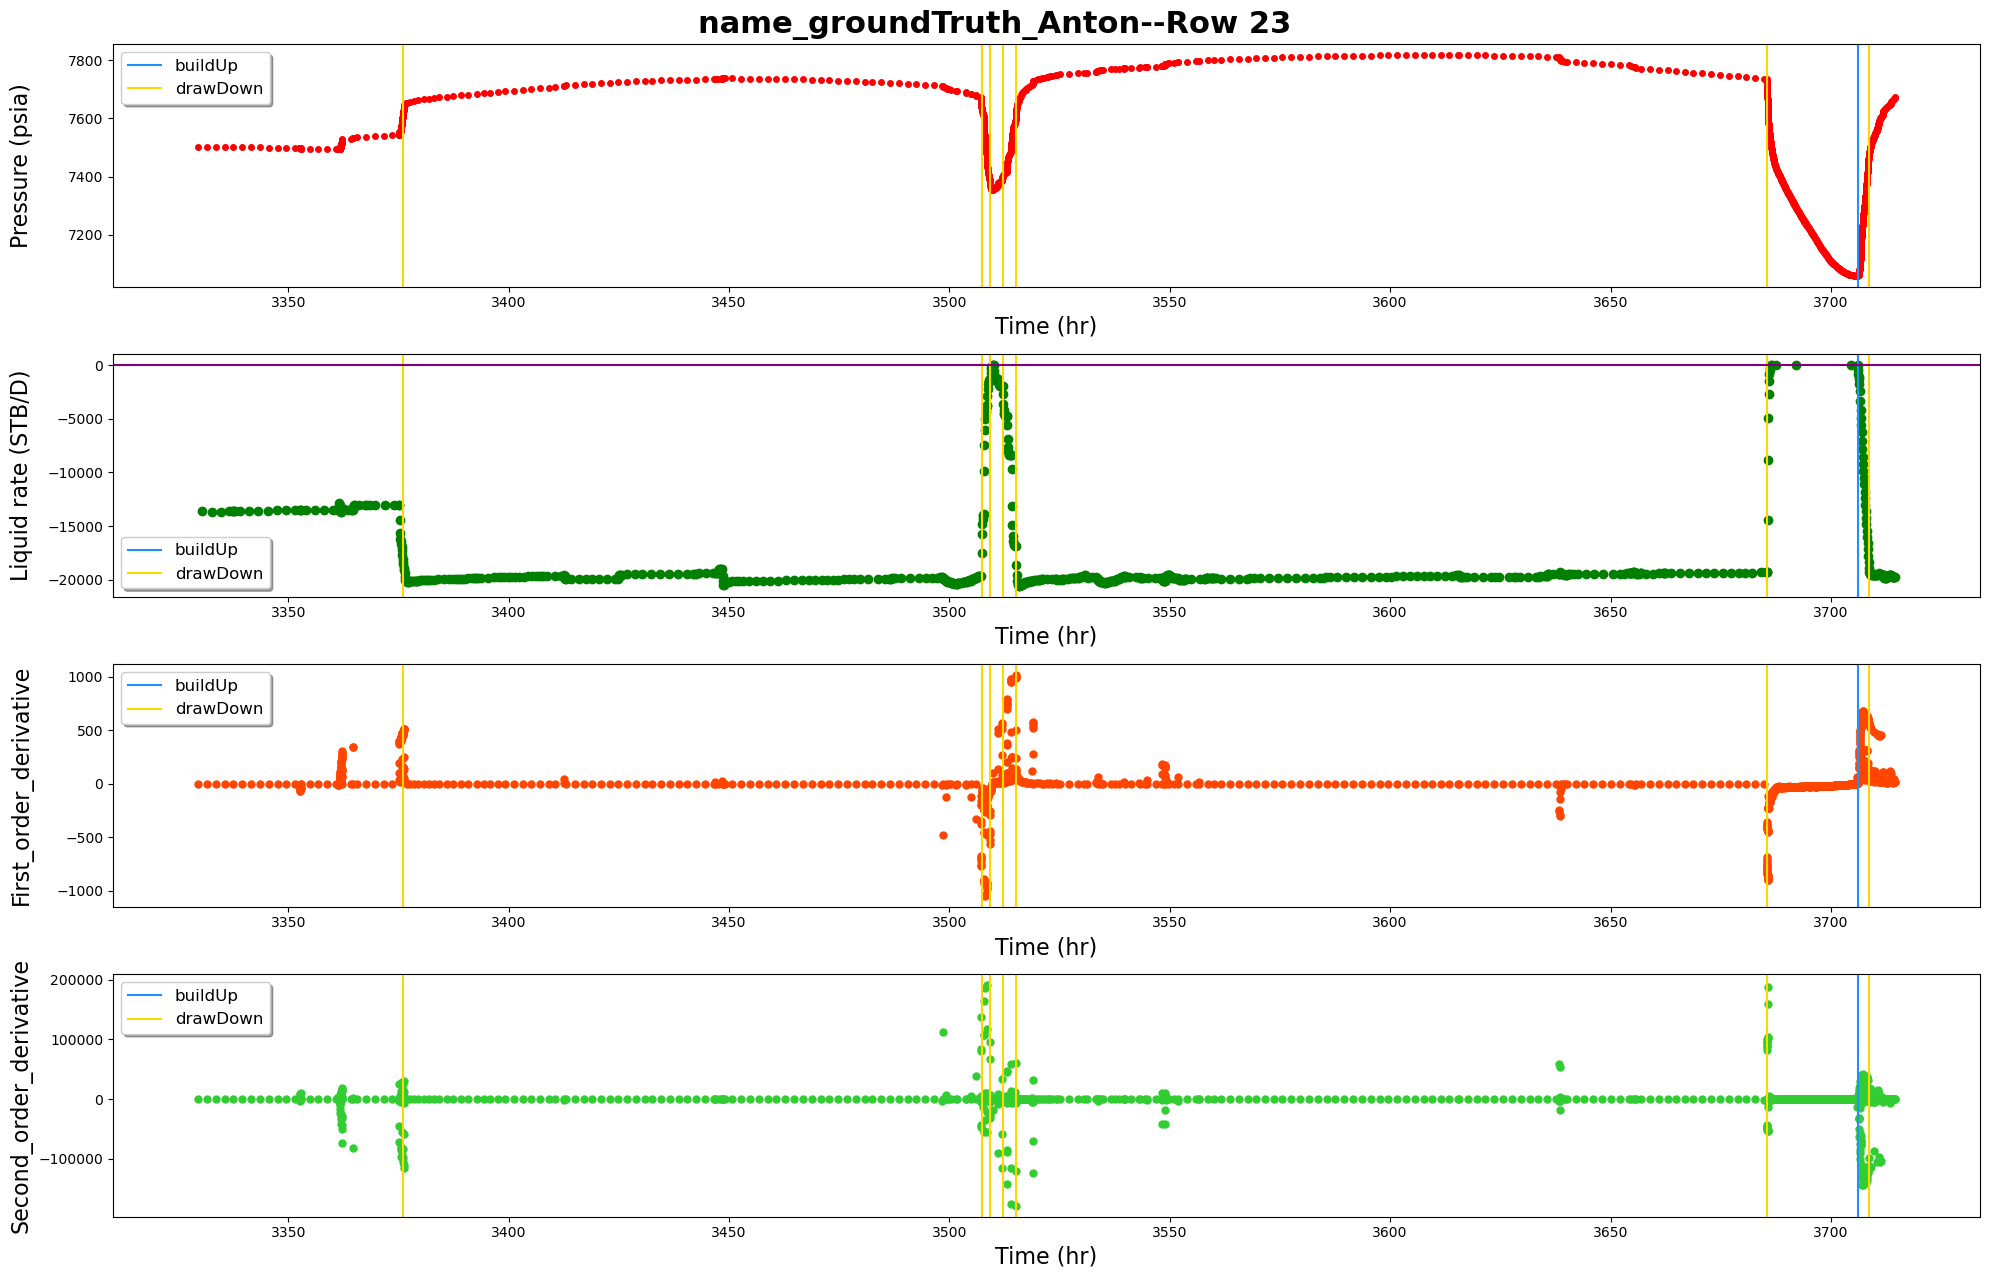

------row 24-----detected points:[27770, 27968, 28113, 28321, 28491, 28616, 28792]


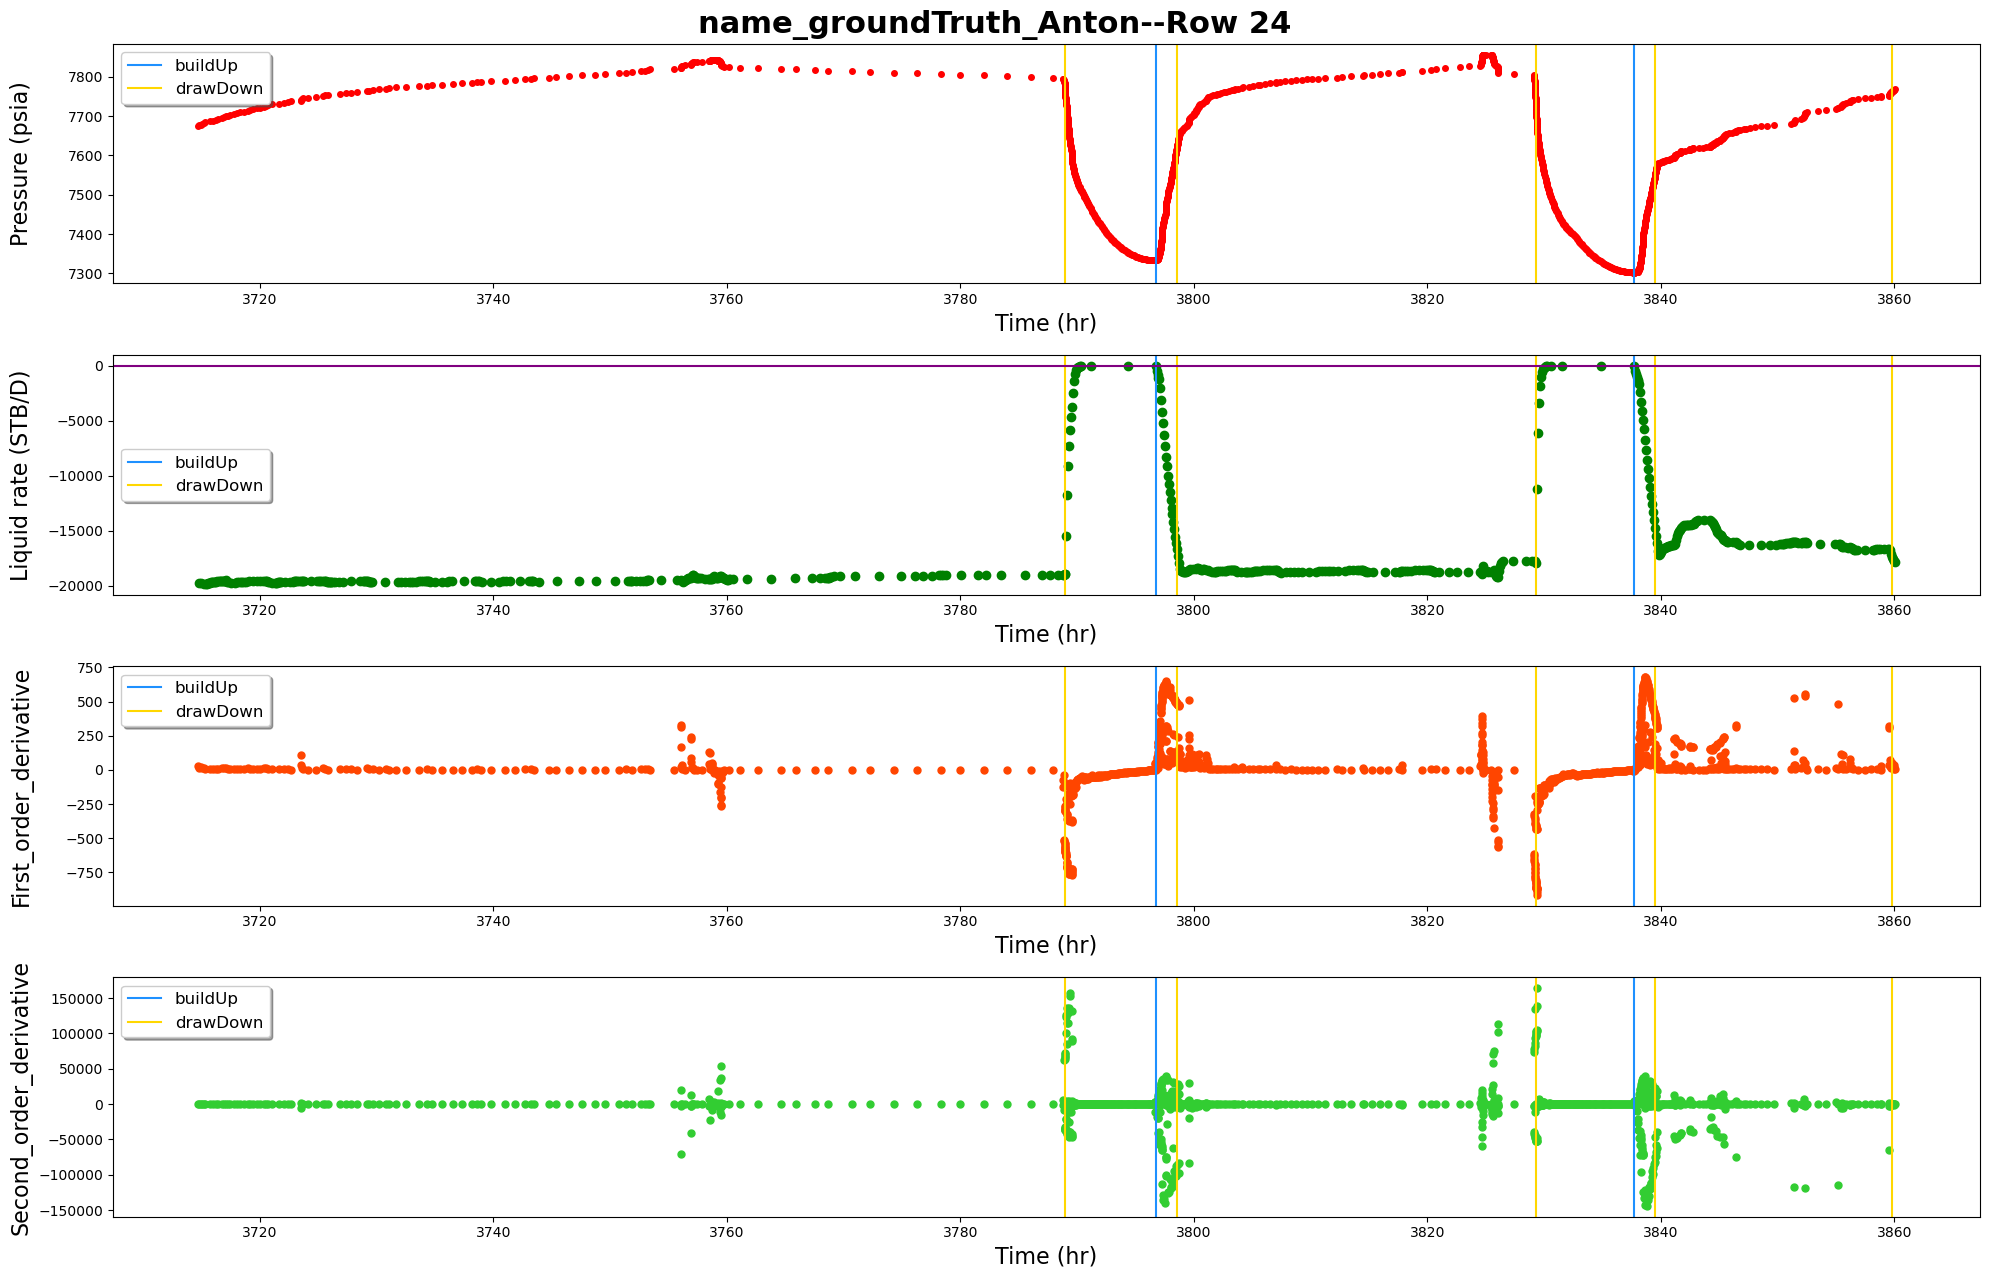

------row 25-----detected points:[28827, 28849, 29117, 29164, 29293, 29363, 29441, 29812, 29812, 29812, 29812, 29812, 29812, 29812, 29812, 29812, 29812, 29812, 29812]


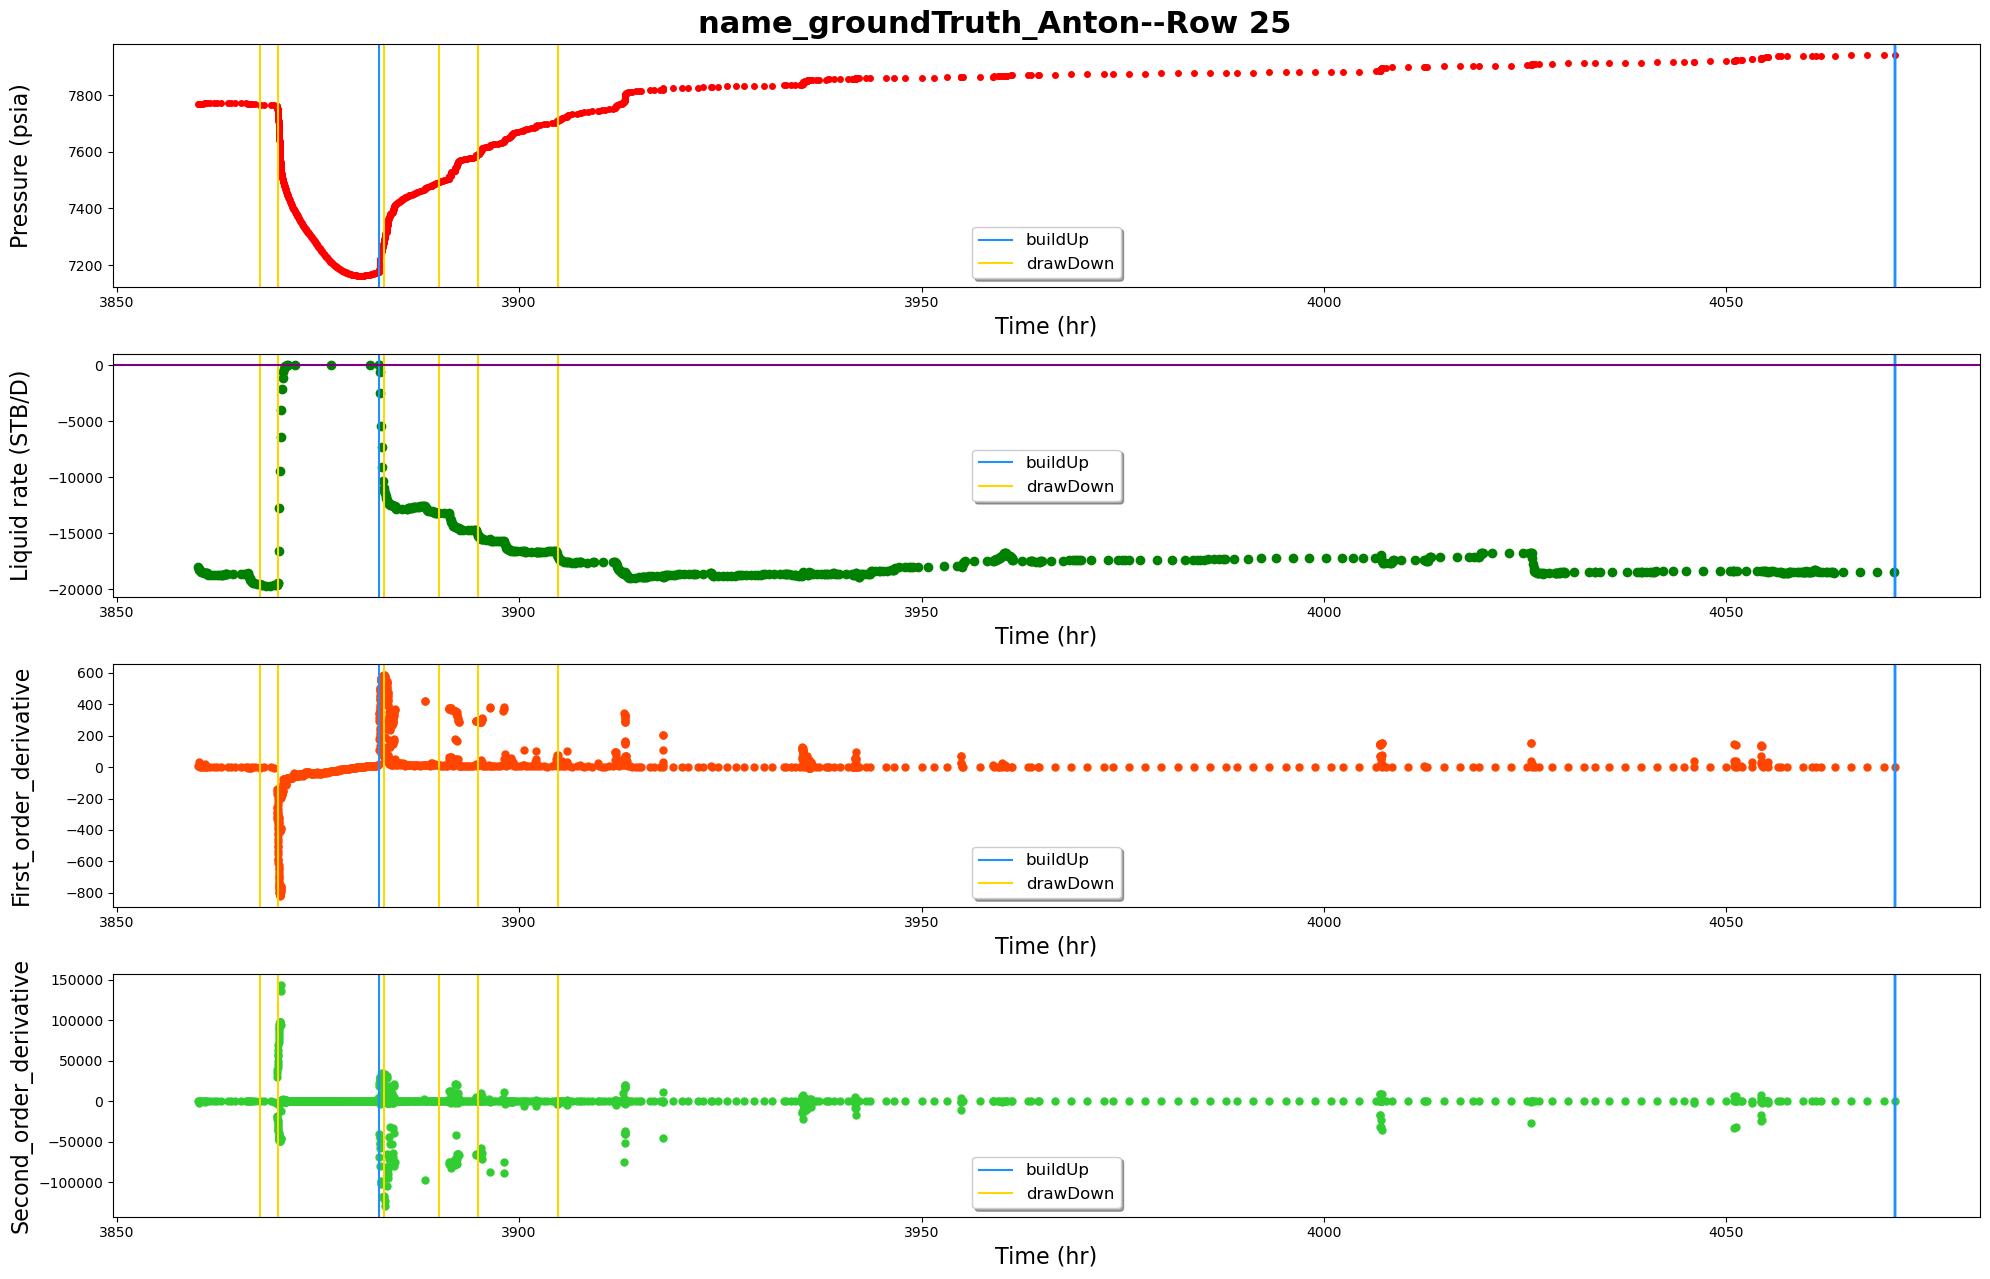

In [10]:
txt=""
parameters={"name":"groundTruth_Anton"
            }
# detect_points_dict={"buildUp":buildUp_groundTruth,
#                    "drawDown":drawDown_groundTruth}

# parameters={"name":"groundTruth_Anton_zeroRate"
#             }
drawDown=[point for point in breakPoints_grountTruth if point not in  breakPoints_zeroRate]
detect_points_dict={"buildUp":breakPoints_zeroRate,
                   "drawDown":drawDown}
buildup=detect_points_dict["buildUp"]
drawdown=detect_points_dict["drawDown"]
txt=f"buildup:{len(buildup)}, drawdown:{len(drawdown)}"
pprint(txt)
plot_whole=True
plot_details=True
plot_statistics=False
save=True
folder_name=f"ground_Truth_Anton"
# folder_name="removed_transients"
%run plot_N_save.ipynb